#  Naveen's Assignment

###  Submitted by: **Naveen Kumar**  
📱 **Mobile Number:** 9671833292  
📘 **Topic of Assignment:** *Unsupervised Machine Learning & Recommendation System*

---


# a)	Explain the Eigenvalue and eigenvector in detail along with some examples. Its role in PCA.

#  Eigenvalues and Eigenvectors – A Simple, Intuitive Explanation

---

##  What Are Eigenvectors?

Imagine you have a shape (like a cloud of data points), and you apply a transformation (like stretching, compressing, or rotating) to it.

Most directions in the shape will change — but a few special directions will **stay pointing the same way**, even though they may get longer or shorter.

Those special directions are called **eigenvectors**.

---

##  What Are Eigenvalues?

An **eigenvalue** tells us **how much** an eigenvector is stretched or compressed when the transformation is applied.

- If the eigenvalue is **greater than 1**, the vector gets stretched.
- If it’s **between 0 and 1**, it gets compressed.
- If it’s **1**, the length stays the same.
- If it’s **0**, the vector is completely squashed!

---

##  Real-Life Analogy

Think of a flag blowing in the wind. You can imagine many directions the flag might flap in.

But when a strong wind blows in one **main direction**, most of the flag aligns with that direction. That main direction is like an **eigenvector**, and the **strength of the wind in that direction** is like the **eigenvalue**.

---

##  Role in PCA (Principal Component Analysis)

**PCA** is a technique used in data science to make big datasets smaller and easier to understand — without losing much important information.

Here’s how **eigenvalues and eigenvectors** are used in PCA:

1. **Look at your data** (e.g., hundreds of features or measurements).
2. **Find the directions** in which the data spreads out the most — these are the **eigenvectors**.
3. **Measure how much variance** (spread) exists in each direction — these are the **eigenvalues**.
4. **Keep only the top directions** with the biggest variance (largest eigenvalues).
5. **Project your data** onto these directions. Now you have fewer features, but still most of the useful information!

---

##  Simple Example in Daily Life

Imagine you're shopping online and a site tracks:
- Height
- Weight
- Clothing size
- Chest
- Waist

All these measurements may be correlated.

PCA might find that 2-3 combinations of these features explain **most of the variation** — e.g., just “body build” and “clothing fit”.

So instead of keeping 5 features, PCA uses 2 or 3 **new features** (called **principal components**) that are calculated using **eigenvectors**.

---

##  Why Is This Useful?

- It **removes noise and redundancy** in your data.
- Makes **visualization** easier (e.g., projecting 100D data into 2D or 3D).
- Helps with **faster and better machine learning** performance.
- Reduces **storage and computational cost**.

---

##  Key Takeaways

| Concept       | Meaning                                                                 |
|---------------|-------------------------------------------------------------------------|
| Eigenvector   | A direction that doesn't change when transformation is applied          |
| Eigenvalue    | How much the eigenvector is stretched or squashed                       |
| In PCA        | Eigenvectors = directions of max variance; Eigenvalues = how important  |

---

##  Summary in One Line

**PCA uses eigenvectors to find the most important directions in data and eigenvalues to decide which directions to keep.**



## b)	Use the Students' Social Network Profile Clustering dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab.

####  https://www.kaggle.com/datasets/zabihullah18/students-social-network-profile-clustering/data

### i.	Download the dataset from above link and load it into your Python environment.
### ii.	Perform the EDA and do the visualizations.
### iii.	Check the distributions/skewness in the variables and do the transformations if required.
### iv.	Check/Treat the outliers and do the feature scaling if required.
### v.	Create a ML model to segment the students with similar interests, demographic profiling, and trend analysis over time.
### vi.	Try out all the 3 clustering methods (K-Mean, Hierarchical, DBSCAN) and compare their silhoutte scores.



##  Overview

This project performs **correlation analysis** and **hierarchical clustering** on a dataset using Python. The goal is to uncover patterns of similarity between features by visualizing them through a **clustermap** — a combination of a heatmap and dendrograms.

##  Technologies Used

- **Python**
- `pandas` – Data manipulation
- `numpy` – Numerical operations
- `matplotlib` – Plotting library
- `seaborn` – Statistical data visualization
- `IPython.display` – Enhanced notebook output display (Jupyter)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display


## Warning Handling

To maintain a clean and readable output, especially when working in Jupyter notebooks, all runtime warnings are globally suppressed using Python's `warnings` module. This prevents minor or non-critical warnings from cluttering the visualization and analysis workflow.

> Note: While this improves notebook readability, it is recommended to use this setting cautiously. Suppressing warnings may obscure useful diagnostic information during development and debugging.


In [6]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



##  Data Loading

The dataset is loaded using the `pandas` library from a local CSV file. It contains marketing-related data that will be used for unsupervised clustering analysis.

Once successfully read into a DataFrame, a confirmation message is printed to indicate that the data has been loaded without errors.

> Ensure that the file path is correctly specified and accessible on your system.


In [8]:
# Load the dataset
df = pd.read_csv(r"F:\naveen personal work\iitg\python_final\unsupervised_machine_learning\Clustering_Marketing.csv")

print("Sucessfully data Loaded")

Sucessfully data Loaded


##  Data Preview

To inspect the structure and contents of the dataset, the first few rows are displayed using the `head()` function. This helps verify that the data has been loaded correctly and provides a quick look at the variables available for analysis.

This step is useful for:

- Confirming column names and data types
- Checking for missing or unusual values
- Understanding the general format of the dataset


df.head()

##  View Bottom Rows of the Dataset

The `tail()` function is used to display the last few rows of the dataset. This is helpful to:

- Verify the dataset's completeness
- Check for inconsistencies or unusual values at the end
- Understand how the data is structured throughout the file

It complements `head()` by giving a full-range perspective of the dataset from top to bottom.


In [12]:
df.tail()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14999,2009,F,15.811,25,0,0,7,0,0,0,...,0,2,1,1,0,0,0,0,0,1


##  Random Sample of the Dataset

The `sample(5)` function is used to display a random selection of 5 rows from the dataset. This provides a more varied look at the data, which can be useful for:

- Spot-checking data quality and consistency
- Observing variability across different records
- Identifying potential anomalies or patterns not visible in the top or bottom rows

Random sampling helps ensure that the dataset is generally well-structured throughout.


In [14]:
df.sample(5)

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
5388,2007,F,17.054,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3765,2009,M,16.008,68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3116,2009,F,16. Nov,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7021,2008,F,16.37,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,0
2982,2006,M,19.302,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


##  Dataset Information Summary

The `info()` function provides a concise summary of the dataset, including:

- Total number of entries (rows)
- Number of columns
- Column names and their data types
- Count of non-null (non-missing) values per column
- Memory usage of the DataFrame

This step is essential for understanding the structure and completeness of the data, identifying missing values, and verifying data types before analysis or preprocessing.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

##  Data Types of Each Column

The `dtypes` attribute is used to display the data type of each column in the DataFrame. This helps identify:

- Whether columns are numerical (`int64`, `float64`)
- Categorical or text-based (`object`)
- Date/time fields (`datetime64`, if applicable)

Understanding data types is crucial for:
- Selecting appropriate preprocessing steps
- Ensuring compatibility with clustering algorithms
- Detecting any necessary type conversions before analysis


In [18]:
df.dtypes

gradyear            int64
gender             object
age                object
NumberOffriends     int64
basketball          int64
football            int64
soccer              int64
softball            int64
volleyball          int64
swimming            int64
cheerleading        int64
baseball            int64
tennis              int64
sports              int64
cute                int64
sex                 int64
sexy                int64
hot                 int64
kissed              int64
dance               int64
band                int64
marching            int64
music               int64
rock                int64
god                 int64
church              int64
jesus               int64
bible               int64
hair                int64
dress               int64
blonde              int64
mall                int64
shopping            int64
clothes             int64
hollister           int64
abercrombie         int64
die                 int64
death               int64
drunk       

##  Statistical Summary of the Dataset

The `describe().T` function provides a **transposed statistical summary** of the numerical columns in the dataset. It includes:

- **count**: Number of non-null entries
- **mean**: Average value
- **std**: Standard deviation
- **min** and **max**: Range of values
- **25%**, **50% (median)**, **75%**: Percentile distribution

Transposing the output (`.T`) switches rows and columns, making it easier to read when there are many features.

This summary helps:


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gradyear,15000.0,2007.496933,1.116516,2006.0,2006.0,2008.0,2008.0,2009.0
NumberOffriends,15000.0,29.834533,35.386649,0.0,3.0,20.0,44.0,605.0
basketball,15000.0,0.267000,0.788851,0.0,0.0,0.0,0.0,22.0
football,15000.0,0.255467,0.702260,0.0,0.0,0.0,0.0,9.0
soccer,15000.0,0.222000,0.920420,0.0,0.0,0.0,0.0,22.0
softball,15000.0,0.159667,0.737344,0.0,0.0,0.0,0.0,17.0
volleyball,15000.0,0.142933,0.638747,0.0,0.0,0.0,0.0,14.0
swimming,15000.0,0.135000,0.548691,0.0,0.0,0.0,0.0,31.0
cheerleading,15000.0,0.105133,0.502491,0.0,0.0,0.0,0.0,8.0
baseball,15000.0,0.104133,0.519205,0.0,0.0,0.0,0.0,14.0


##  Missing Values Check

The `isnull().sum()` function is used to identify the number of missing (null) values in each column of the dataset.

This step is critical for:

- Detecting incomplete data that may require cleaning or imputation


In [22]:
df.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

##  Dataset Dimensions

The `shape` attribute returns the dimensions of the dataset in the format `(rows, columns)`.

This provides:

- The **total number of records (rows)** in the dataset
- The **number of features (columns)** available for analysis

Unde


In [24]:
df.shape

(15000, 40)

##  Duplicate Records Check

The `duplicated().sum()` function counts the number of **duplicate rows** in the dataset.

This step helps to:

- Identify redundant data entries
- Maintain data integrity and quality
- Prevent bias or distortion in clustering and analysis

Removing duplicates ensures that each observation contributes uniquely to the model or visualization, avoiding overrepresentation of repeated records.


In [26]:
df.duplicated().sum()

266

##  Removing Duplicate Records

To ensure data quality, duplicate rows are removed using the `drop_duplicates()` method. The cleaned dataset is stored in a new DataFrame named `df_no_duplicate`.

Key benefits of this step include:

- Eliminating redundant entries
- Reducing noise in clustering and visualization
- Ensuring accurate representation of each unique observation

This operation preserves the first occurrence of each duplicate and removes any additional identical rows by default.


In [28]:
df_no_duplicate = df.drop_duplicates()

##  Preview of Cleaned Dataset

After removing duplicate records, the `head()` function is used to display the first few rows of the cleaned DataFrame `df_no_duplicate`.

This preview helps to:

- Confirm that duplicates have been successfully removed
- Visually inspect the structure and contents of the cleaned data
- Verify that the dataset is ready for further processing and analysis


In [30]:
df_no_duplicate.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


##  Dimensions of Cleaned Dataset

The `shape` attribute is used to check the size of the cleaned dataset stored in `df_no_duplicate`. It returns a tuple representing:

- The total number of **rows** (observations) remaining after duplicate removal
- The number of **columns** (features) available for analysis

This confirms how much data is retained and ensures readiness for clustering and visualization tasks.


In [32]:
df_no_duplicate.shape

(14734, 40)

##  Missing Values Check (After Duplicate Removal)

The `isnull().sum()` function is applied again to the cleaned dataset (`df_no_duplicate`) to verify the presence of any missing values after removing duplicates.

This ensures that:

- No null values were introduced or overlooked during the cleaning process
- The dataset remains suitable for further analysis without interruption
- Additional preprocessing steps (e.g., imputation or dropping columns) can be planned if needed

A zero count across all columns that the dataset is free from missing data.


In [34]:
df_no_duplicate.isnull().sum()

gradyear              0
gender             1140
age                2240
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

##  Column Info: `gender` and `age`

The `info()` function is used on the selected columns `gender` and `age` from the cleaned dataset (`df_no_duplicate`) to:

- Check the **data types** of each column
- Confirm the **number of non-null values**
- Understand the **storage type** (e.g., `object`, `int64`)

This helps verify that:

- The `gender` column is likely categorical (`object`)
- The `age` column is numerical (`int64` or `float64`)
- Both columns are properly populated and ready for preprocessing (e.g., encoding or binning)


In [36]:
df_no_duplicate[['gender', 'age']].info()


<class 'pandas.core.frame.DataFrame'>
Index: 14734 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  13594 non-null  object
 1   age     12494 non-null  object
dtypes: object(2)
memory usage: 345.3+ KB


##  Handling Missing Values in the `gender` Column

Missing values in the `gender` column are filled using the most **frequent category** (mode) from the same column. This is done using the `fillna()` method with `mode()[0]`:

- Ensures that no null values remain in the `gender` column
- Maintains consistency by filling with the statistically most common value
- Preserves data integrity for categorical variables without introducing bias from arbitrary imputation

The use of `inplace=True` applies the changes directly to the existing DataFrame (`df_no_duplicate`).


In [38]:
df_no_duplicate['gender'].fillna(df_no_duplicate['gender'].mode()[0], inplace=True)


##  Converting `age` Column to Numeric

The `age` column is explicitly converted to a numeric data type using `pd.to_numeric()`, with the parameter `errors='coerce'`. This step:

- Converts valid values to numbers (`int` or `float`)
- Replaces any non-numeric or malformed entries with `NaN` (missing values)
- Ensures that the column is suitable for numerical analysis, such as clustering or statistical operations

This is a crucial step when data types are inconsistent or when numeric fields may have been read as strings due to formatting issues.


In [40]:
df_no_duplicate['age'] = pd.to_numeric(df_no_duplicate['age'], errors='coerce')


##  Imputing Missing Values in `age` with Median

After converting the `age` column to numeric, any resulting `NaN` values (from non-numeric entries) are filled using the **median** of the column. This approach:

- Ensures no missing values remain in the `age` column
- Is robust to outliers, making it a preferred method for skewed distributions
- Maintains the central tendency of the data without introducing extreme values

The `inplace=True` argument ensures that the changes are applied directly to the `df_no_duplicate` DataFrame.


In [42]:
df_no_duplicate['age'].fillna(df_no_duplicate['age'].median(), inplace=True)


##  Final Null Value Verification

A final check is performed using `isnull().sum()` on the cleaned dataset (`df_no_duplicate`) to ensure that all missing values have been handled.

This step confirms that:

- All earlier imputation and cleaning steps were successful
- The dataset is now free of `NaN` values
- The data is ready for further analysis, such as correlation calculation or clustering

A result of zero nulls across all columns indicates that the dataset is fully preprocessed and reliable.


In [44]:
df_no_duplicate.isnull().sum()

gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

##  Final Dataset Overview

After completing data cleaning and preprocessing, the `info()` and `describe()` functions are used to validate the structure and quality of the dataset.

###  `info()`
- Displays the number of entries, column names, and data types
- Verifies that there are no missing values
- Confirms that all variables are appropriately typed (e.g., numerical or categorical)

### `describe()`
- Provides statistical summaries for all numerical columns:
  - **Count**: Number of non-null entries
  - **Mean**: Average value
  - **Standard Deviation**: Spread of the data
  - **Min/Ma**


In [46]:
df_no_duplicate.info()
df_no_duplicate.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 14734 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gradyear         14734 non-null  int64  
 1   gender           14734 non-null  object 
 2   age              14734 non-null  float64
 3   NumberOffriends  14734 non-null  int64  
 4   basketball       14734 non-null  int64  
 5   football         14734 non-null  int64  
 6   soccer           14734 non-null  int64  
 7   softball         14734 non-null  int64  
 8   volleyball       14734 non-null  int64  
 9   swimming         14734 non-null  int64  
 10  cheerleading     14734 non-null  int64  
 11  baseball         14734 non-null  int64  
 12  tennis           14734 non-null  int64  
 13  sports           14734 non-null  int64  
 14  cute             14734 non-null  int64  
 15  sex              14734 non-null  int64  
 16  sexy             14734 non-null  int64  
 17  hot              

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,...,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000,14734.000000
mean,2007.502647,17.870111,30.358694,0.271752,0.260079,0.226008,0.162549,0.145514,0.137437,0.107031,...,0.114904,0.264151,0.363717,0.152980,0.073096,0.052396,0.189222,0.120198,0.093389,0.062169
std,1.115820,7.033861,35.483764,0.795097,0.707725,0.928204,0.743655,0.644196,0.553319,0.506806,...,2.732918,0.709858,0.733461,0.482588,0.359328,0.283192,0.614893,0.459012,0.424229,0.352152
min,2006.000000,4.309000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,16.523000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,17.295000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,18.077250,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,605.000000,22.000000,9.000000,22.000000,17.000000,14.000000,31.000000,8.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


##  Exploring Unique Values in `gender` Column

The `unique()` function is used to list all distinct values present in the `gender` column of the cleaned dataset.

This step helps to:

- Understand the categorical diversity in the `gender` variable
- Identify potential issues like inconsistent capitalization or unexpected entries (e.g., "Male", "male", "M")
- Guide further preprocessing steps such as encoding or value normalization

Knowing the unique categories is essential before applying clustering algorithms or encoding methods to categorical features.


In [48]:
df_no_duplicate['gender'].unique()


array(['F', 'M'], dtype=object)

##  Frequency Distribution of `gender`

The `value_counts()` function is used to display the frequency of each unique category in the `gender` column. This provides a quick overview of how the data is distributed across gender classes.

Key benefits of this step:

- Identifies the dominant category (most frequent value)
- Helps detect class imbalance, which may affect clustering or model behavior
- Valida


In [50]:
df_no_duplicate['gender'].value_counts()

gender
F    12141
M     2593
Name: count, dtype: int64

##  Encoding `gender` Column: Mapping to Numeric Values

The `map()` function is used to convert the categorical values in the `gender` column into numeric format for machine learning compatibility:

- `"M"` is mapped to `1`
- `"F"` is mapped to `0`

This binary encoding is useful for:

- Enabling the use of `gender` in numerical algorithms like clustering
- Simplifying data representation for modeling
- Preserving interpretability, as `1` and `0` clearly indicate male and female categories

Note: This operation creates a transformed Series. To store the result, assign it back to the column:



In [52]:
df_no_duplicate['gender'].map({"M":1 , "F":0})

0        0
1        0
2        0
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: gender, Length: 14734, dtype: int64

##  Verifying Data Types After Encoding

The `dtypes` attribute is checked again to confirm the current data types of all columns in the `df_no_duplicate` DataFrame after preprocessing.

This step is essential to:

- Ensure that all **categorical columns** (like `gender`) have been correctly converted to **numeric types**
- Validate that **numerical features** are appropriately typed as `int64` or `float64`
- Confirm compatibility with upcoming machine learning algorithms such as clustering, which require numerical inputs

This also serves as a final validation before computing correlations or applying unsupervised learning techniques.


In [54]:
df_no_duplicate.dtypes

gradyear             int64
gender              object
age                float64
NumberOffriends      int64
basketball           int64
football             int64
soccer               int64
softball             int64
volleyball           int64
swimming             int64
cheerleading         int64
baseball             int64
tennis               int64
sports               int64
cute                 int64
sex                  int64
sexy                 int64
hot                  int64
kissed               int64
dance                int64
band                 int64
marching             int64
music                int64
rock                 int64
god                  int64
church               int64
jesus                int64
bible                int64
hair                 int64
dress                int64
blonde               int64
mall                 int64
shopping             int64
clothes              int64
hollister            int64
abercrombie          int64
die                  int64
d

##  Gender Distribution Visualization

A bar plot is created using `seaborn.countplot()` to visualize the distribution of gender in the dataset:

- The x-axis represents the **gender categories** (0 = Female, 1 = Male).
- The y-axis shows the **count of records** in each category.
- A custom `xticks` label mapping is applied to improve readability.

This visualization helps to:

- Understand class balance between male and female entries
- Detect any skew or imbalance that might affect clustering
- Verify that gender encoding (0/1) has been correctly interpreted

The plot provides an intuitive snapshot of gender demographics within the dataset.


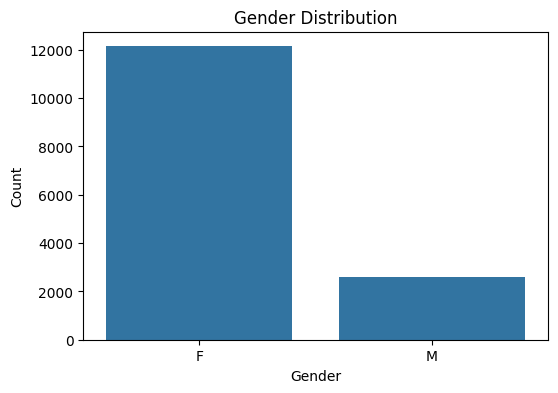

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df_no_duplicate)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['F', 'M'])  # Assuming 0 = F, 1 = M
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##  Age Distribution Visualization

A histogram with a Kernel Density Estimate (KDE) overlay is plotted using `seaborn.histplot()` to visualize the distribution of the `age` variable:

- The histogram displays the **frequency** of individuals across different age intervals (15 bins).
- The KDE curve provides a smooth estimate of the underlying age distribution.
- The x-axis represents **age**, while the y-axis shows the **number of individuals** in each age group.

This visualization helps to:

- Understand the overall age demographics of the dataset
- Detect skewness or multimodal patterns in the data
- Identify potential outliers or gaps that may influence clustering

It serves as a crucial step before scaling or applying clustering algorithms on numerical features.


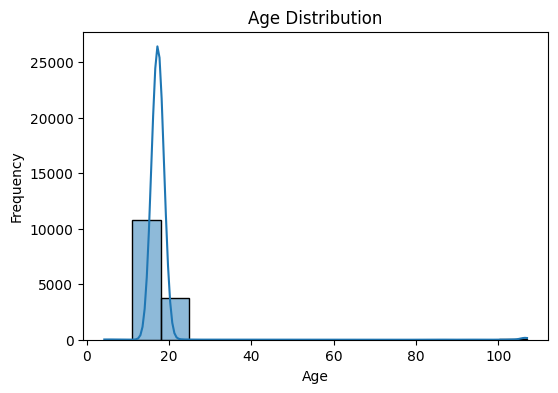

In [58]:
plt.figure(figsize=(6, 4))
sns.histplot(df_no_duplicate['age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


##  Age vs. Number of Friends by Gender

A scatter plot is created using `seaborn.scatterplot()` to explore the relationship between **age** and **number of friends**, with color-coding by **gender**:

- The x-axis represents **age**
- The y-axis represents the **number of friends**
- Data points are colored by gender using the `Set1` palette:
  - Red (0) = Female
  - Blue (1) = Male

This visualization helps to:

- Identify trends or correlations between age and social connectivity
- Examine gender-based clustering patterns or behavioral differences
- Detect potential outliers or concentration zones that may influence unsupervised learning

The legend and labels provide clarity for interpreting gender-based differences across the age spectrum.


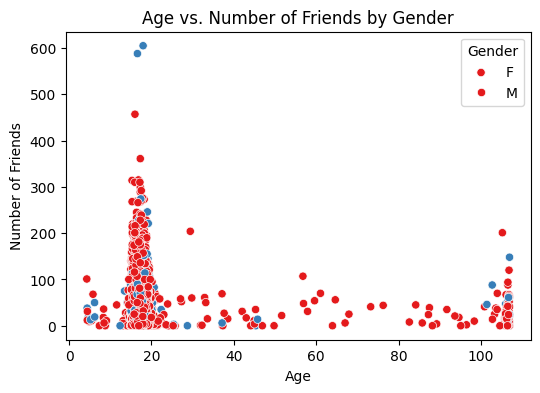

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='age',
    y='NumberOffriends',
    hue='gender',
    data=df_no_duplicate,
    palette='Set1'
)
plt.title('Age vs. Number of Friends by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Friends')
plt.legend(title='Gender', labels=['F', 'M'])  # Assuming 0 = F, 1 = M
plt.show()


##  Number of Friends by Gender (Box Plot)

A box plot is created using `seaborn.boxplot()` to compare the distribution of the `NumberOffriends` variable across gender groups:

- The x-axis shows the gender categories (`0` = Female, `1` = Male)
- The y-axis displays the number of friends
- Each box represents:
  - **Median** (central line)
  - **Interquartile range (IQR)** — the box itself
  - **Whiskers** — range within 1.5×IQR
  - **Outliers** — individual points beyond whiskers

This visualization is useful for:

- Comparing **central tendency** and **spread** of friendships between males and females
- Identifying **outliers** in friend count per


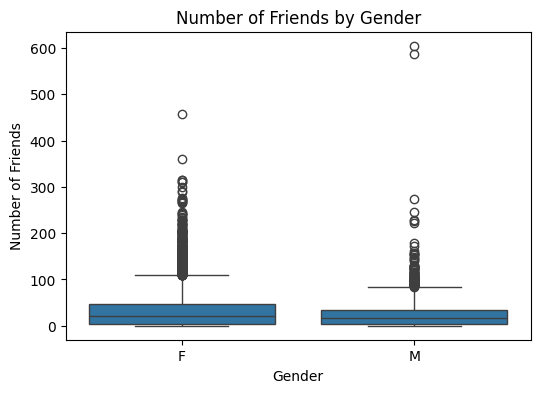

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='NumberOffriends', data=df_no_duplicate)
plt.title('Number of Friends by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Friends')
plt.xticks([0, 1], ['F', 'M'])  # Assuming 0 = F, 1 = M
plt.show()


In [63]:
print(df_no_duplicate.columns)


Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')


##  Outlier Detection with Percentage Summary

A custom Python function, `detect_outliers_with_percentage()`, is defined to identify and quantify outliers in all **numerical columns** of a DataFrame using the **Interquartile Range (IQR)** method.

###  Methodology

For each numeric column:
- **Q1 (25th percentile)** and **Q3 (75th percentile)** are calculated
- The **IQR** is defined as `Q3 - Q1`
- **Outlier thresholds** are set as:
  - Lower bound = Q1 - 1.5 × IQR
  - Upper bound = Q3 + 1.5 × IQR
- All values outside these bounds are considered outliers

###  Output

The function returns a **summary DataFrame** sorted by outlier percentage, containing:
- `outliers`: Number of outlier values
- `total`: Total observations in the column
- `percentage`: Proportion of outliers as a percentage of total entries

###  Benefits

- Provides a clear view of which features contain the most extreme values
- Useful for deciding whether to **transform**, **cap**, or **remove** outliers
- Aids in improving clustering accuracy by reducing the influence of outliers

> This function is a valuable diagnostic step in the preprocessing pipeline for unsupervised learning.


In [65]:
import pandas as pd

def detect_outliers_with_percentage(df):
    outlier_summary = {}

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower) | (df[column] > upper)]
        outlier_count = outliers.shape[0]
        total_count = df.shape[0]
        percentage = (outlier_count / total_count) * 100

        outlier_summary[column] = {
            'outliers': outlier_count,
            'total': total_count,
            'percentage': round(percentage, 2)
        }

    return pd.DataFrame(outlier_summary).T.sort_values(by='percentage', ascending=False)


##  Outlier Report Summary

The `detect_outliers_with_percentage()` function is applied to the cleaned dataset `df_no_duplicate`, and the resulting report is stored in a new variable called `outlier_report`.

The report provides a **column-wise summary** of:

- The **number of outlier values**
- The **total number of records** per column
- The **percentage of outliers** relative to total entries

###  Display

Instead of using `print()`, the report is shown with `display()`, which provides a more readable and formatted output—especially when working in Jupyter Notebooks.

This step:

- Highlights the features most affected by extreme values
- Helps guide decisions on **data transformation**, **outlier capping**, or **removal**
- Improves interpretability before applying clustering algorithms


In [67]:
outlier_report = detect_outliers_with_percentage(df_no_duplicate)

# print(outlier_report)
display(outlier_report)

,outliers,total,percentage
hair,3407.0,14734.0,23.12
dance,3323.0,14734.0,22.55
cute,3113.0,14734.0,21.13
mall,2633.0,14734.0,17.87
football,2499.0,14734.0,16.96
rock,2450.0,14734.0,16.63
basketball,2411.0,14734.0,16.36
band,2208.0,14734.0,14.99
church,2104.0,14734.0,14.28
die,1980.0,14734.0,13.44


##  Outlier Percentage by Column (Horizontal Bar Chart)

A horizontal bar chart is created to visualize the **percentage of outliers** detected in each numerical column:

###  Steps:
- The `outlier_report` DataFrame is reset to include the column names as a new `column` column.
- The data is sorted in ascending order based on the **percentage** of outliers.
- A horizontal bar plot is generated using `matplotlib`.

###  Plot Details:
- **X-axis**: Outlier percentage (%)
- **Y-axis**: Column names (features)
- **Color**: Coral, for visual emphasis

###  Purpose:
- Easily compare outlier severity across features
- Highlight which columns require fu


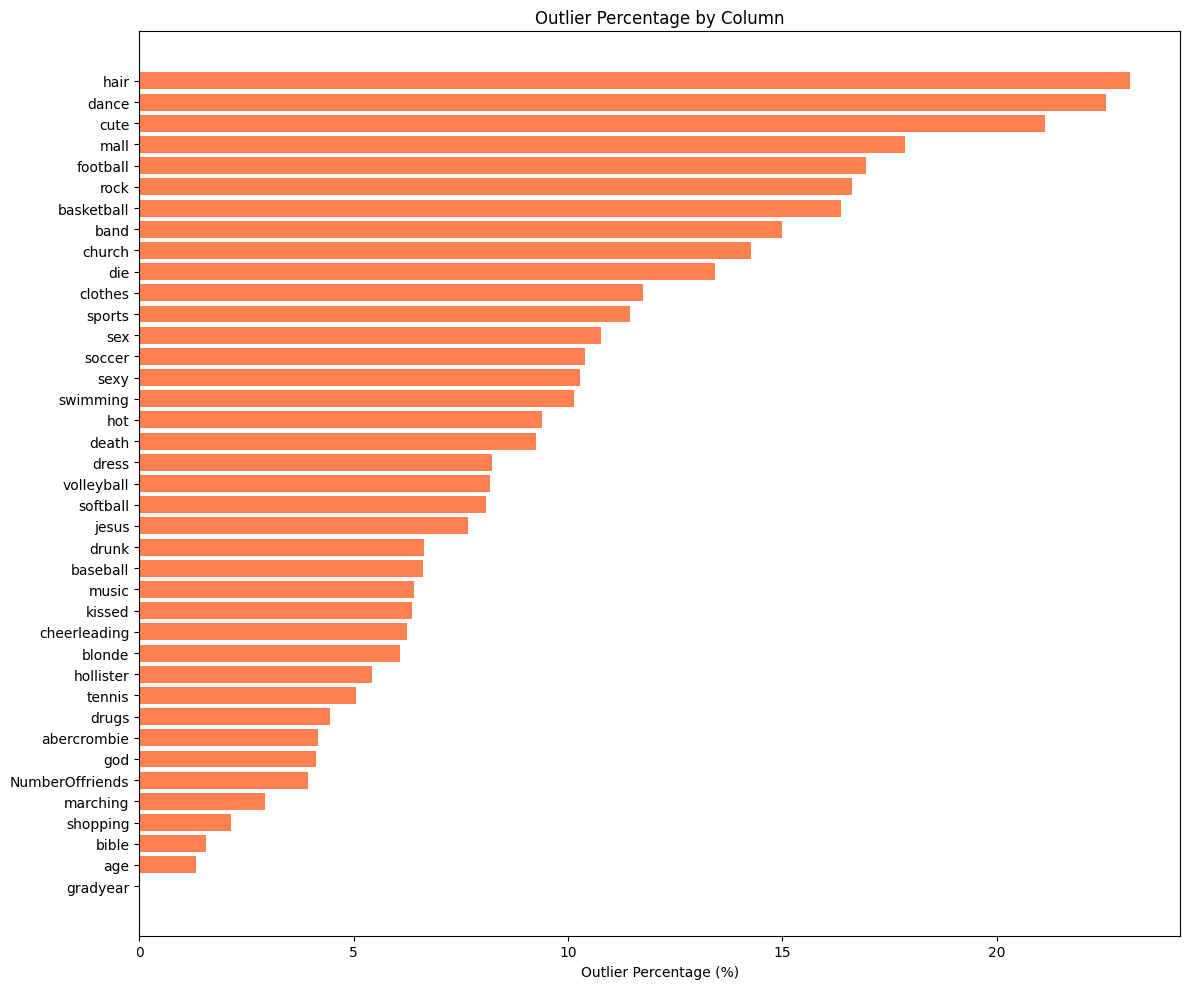

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming outlier_df has column names in the index
outlier_df = pd.DataFrame(outlier_report)

# Reset the index to convert index into a proper column
outlier_df = outlier_df.reset_index().rename(columns={'index': 'column'})

# Plot the sorted bar chart
plt.figure(figsize=(12, 10))
sorted_df = outlier_df.sort_values(by='percentage', ascending=True)
plt.barh(sorted_df['column'], sorted_df['percentage'], color='coral')
plt.xlabel('Outlier Percentage (%)')
plt.title('Outlier Percentage by Column')
plt.tight_layout()
plt.show()


## Outlier Detection, Capping, and Comparison Using IQR

This section implements a complete workflow to detect and mitigate outliers in a numerical dataset using the **Interquartile Range (IQR)** method.

---

###  Step 1: Detect Outliers by Percentage
A function `detect_outliers_with_percentage()` calculates the percentage of outliers in each numeric column using IQR logic:

- Outliers are defined as values outside `Q1 - 1.5×IQR` and `Q3 + 1.5×IQR`
- The output is a DataFrame listing the percentage of outliers for each column

---

###  Step 2: Cap Outliers Using IQR Limits
A function `apply_iqr_capping()` modifies the dataset by **clipping** all outliers:

- Values below the lower bound or above the upper bound are replaced with the boundary values
- This retains all rows while reducing the impact of extreme values
- The capping factor (default = 1.5) can be adjusted

---

###  Step 3: Apply Detection and Capping
- `outliers_before`: Outlier percentages before capping
- `df_capped`: New DataFrame with capped values
- `outliers_after`: Outlier percentages after capping

---

###  Step 4: Create a Comparison Report
- The before-and-after outlier percentages are joined into a single DataFrame
- Columns are renamed for clarity: `Outlier_%_Before` vs. `Outlier_%_After`
- The report is sorted in descending order of outlier percentage before capping

---

###  Step 5: Display the Comparison
The resulting report clearly shows how effective the capping was in reducing outliers across different features, providing a strong basis for cleaner and more robust clustering or modeling.

> This workflow ensures minimal information loss while correcting skew caused by extreme values.


In [71]:
import pandas as pd

# Step 1: Function to detect outliers using IQR
def detect_outliers_with_percentage(df):
    outlier_summary = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        percent = len(outliers) / len(df) * 100
        outlier_summary[col] = round(percent, 2)
    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Percentage'])

# Step 2: Function to apply IQR capping
def apply_iqr_capping(df, factor=1.5):
    df_capped = df.copy()
    for col in df_capped.select_dtypes(include='number').columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    return df_capped

# Step 3: Apply process to your cleaned data
# Example assumes df_no_duplicate is already cleaned
outliers_before = detect_outliers_with_percentage(df_no_duplicate)
df_capped = apply_iqr_capping(df_no_duplicate)
outliers_after = detect_outliers_with_percentage(df_capped)

# Step 4: Combine reports for comparison
comparison_report = outliers_before.join(outliers_after, lsuffix='_Before', rsuffix='_After')
comparison_report.columns = ['Outlier_%_Before', 'Outlier_%_After']
comparison_report = comparison_report.sort_values(by='Outlier_%_Before', ascending=False)

# Step 5: Display
display(comparison_report)


,Outlier_%_Before,Outlier_%_After
hair,23.12,0.0
dance,22.55,0.0
cute,21.13,0.0
mall,17.87,0.0
football,16.96,0.0
rock,16.63,0.0
basketball,16.36,0.0
band,14.99,0.0
church,14.28,0.0
die,13.44,0.0


##  Preview of Capped Dataset

The `head()` function is used to display the first few rows of the **outlier-capped DataFrame** (`df_capped`), which was generated after applying the IQR-based capping method.

This preview helps to:

- Confirm that the original structure and column order are preserved
- Visually inspect the effect of capping on extreme values
- Ensure the dataset is ready for further steps such as scaling, correlation analysis, or clustering

> This step serves as a validation checkpoint before proceeding to modeling or visualization.


In [73]:
df_capped.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,F,17.295,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
1,2007,F,17.410,49,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
3,2006,F,17.295,36,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0


##  Dimensions of the Capped Dataset

The `shape` attribute is used to verify the size of the outlier-capped DataFrame (`df_capped`). It returns a tuple in the format `(rows, columns)`:

- **Rows**: Total number of records after capping (should match the original cleaned dataset)
- **Columns**: Number of features retained for analysis

This step ensures that no data loss occurred during the capping process and confirms that the dataset remains intact and ready for the next stage in the pipeline.


In [75]:
df_capped.shape

(14734, 40)

##  Skewness Analysis of Numerical Features

This step analyzes the **skewness** of all numerical columns in the `df_capped` dataset to assess the **symmetry** of their distributions.

###  Key Actions:
- The `.skew()` function computes the skewness for each numeric column.
- The results are stored in a new DataFrame called `skew_df` for better readability.
- The output is sorted in **descending order** to highlight the most skewed features.

###  Interpretation:
- A **skewness of 0** indicates a perfectly symmetrical distribution.
- **Positive skew** (right-tailed) means values are concentrated on the left.
- **Negative skew** (left-tailed) means values are concentrated on the right.

###  Purpose:
- Identify features that may benefit from **transformation** (e.g., log, square root) to reduce skew.
- Improve the performance of clustering algorithms that assume normality or balanced scales.

This diagnostic step is crucial for understanding distribution characteristics before scaling or modeling.


In [77]:
import pandas as pd

# Check skewness for all numeric columns in df_capped
skewness = df_capped.select_dtypes(include='number').skew()

# Convert to a DataFrame for better readability
skew_df = pd.DataFrame(skewness, columns=['Skewness']).sort_values(by='Skewness', ascending=False)

# Display skewness report
print(skew_df)


                 Skewness
shopping         1.807747
god              1.747734
NumberOffriends  1.078212
music            0.947444
age              0.121732
dress            0.000000
rock             0.000000
church           0.000000
jesus            0.000000
bible            0.000000
hair             0.000000
band             0.000000
blonde           0.000000
clothes          0.000000
hollister        0.000000
abercrombie      0.000000
die              0.000000
death            0.000000
drunk            0.000000
mall             0.000000
drugs            0.000000
marching         0.000000
dance            0.000000
basketball       0.000000
football         0.000000
soccer           0.000000
softball         0.000000
volleyball       0.000000
swimming         0.000000
cheerleading     0.000000
baseball         0.000000
tennis           0.000000
sports           0.000000
cute             0.000000
sex              0.000000
sexy             0.000000
hot              0.000000
kissed      

##  Skewness Correction Using Multiple Transformations

This section evaluates and corrects **skewness** in the numerical features of the capped dataset (`df_capped`) using several mathematical transformations. The goal is to reduce skew and improve the suitability of features for clustering and other modeling tasks.

---

###  Step-by-Step Process:

#### 1. Identify Column Groups Based on Value Constraints
- **Positive columns**: Required for transformations like `log1p` and `box-cox`
- **Non-negative columns**: Suitable for `sqrt` and `yeo-johnson`
- **All numeric columns**: Used for `cbrt`, which handles negative values

#### 2. Create Separate Copies of the Data
Copies are created to apply each transformation independently, including:
- `log1p`
- `yeo-johnson`
- `box-cox`
- `square root`
- `cube root`

#### 3. Apply Transformations
- **Log1p**: Applies `log(1 + x)` to avoid issues with zeros
- **Yeo-Johnson**: Suitable for non-negative data and zero-inflated distributions
- **Box-Cox**: Applied only to strictly positive columns
- **Sqrt & Cbrt**: Apply root-based scaling to reduce skew, with `cbrt` handling negative values

#### 4. Compute Skewness for Each Version
Skewness is recalculated for each transformation and compared with the original.

#### 5. Compile a Skewness Comparison Table
A final DataFrame (`skew_comparison`) summarizes skewness across all transformations, sorted by the original skew. This helps:

- Identify which transformation most effectively **normalizes** each feature
- Make informed decisions about which version of each feature to retain
- Prepare a well-balanced dataset for further **clustering**, **PCA**, or **modeling**

---

###  Output: Skewness Comparison Table
The displayed table includes:

- Rows: Feature names
- Columns: Skewness values under each transformation
- Sorted by the original skew to highlight most problematic features

> This approach enables a **data-driven transformation strategy**, helping ensure model-ready inputs with minimized distortion from skewed distributions.


In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# 1. Identify numeric columns
numeric_cols = df_capped.select_dtypes(include='number').columns
positive_cols = [col for col in numeric_cols if (df_capped[col] > 0).all()]
non_negative_cols = [col for col in numeric_cols if (df_capped[col] >= 0).all()]
sqrt_cols = non_negative_cols  # for sqrt, we need >= 0

# 2. Create transformed copies
df_log = df_capped.copy()
df_yeo = df_capped.copy()
df_box = df_capped.copy()
df_sqrt = df_capped.copy()
df_cbrt = df_capped.copy()

# 3. Apply transformations

# Log1p (safe for zeros)
for col in positive_cols:
    df_log[col] = np.log1p(df_log[col])

# Yeo-Johnson
pt_yeo = PowerTransformer(method='yeo-johnson')
df_yeo[non_negative_cols] = pt_yeo.fit_transform(df_yeo[non_negative_cols])

# Box-Cox (positive only)
pt_box = PowerTransformer(method='box-cox')
df_box[positive_cols] = pt_box.fit_transform(df_box[positive_cols])

# Square Root
for col in sqrt_cols:
    df_sqrt[col] = np.sqrt(df_sqrt[col])

# Cube Root (handles negatives too)
for col in numeric_cols:
    df_cbrt[col] = np.cbrt(df_cbrt[col])

# 4. Compute skewness for all versions
skew_original = df_capped[numeric_cols].skew()
skew_log = df_log[numeric_cols].skew()
skew_yeo = df_yeo[numeric_cols].skew()
skew_box = df_box[numeric_cols].skew()
skew_sqrt = df_sqrt[numeric_cols].skew()
skew_cbrt = df_cbrt[numeric_cols].skew()

# 5. Combine into a single comparison table
skew_comparison = pd.DataFrame({
    'Original': skew_original,
    'Log1p': skew_log,
    'Yeo-Johnson': skew_yeo,
    'Box-Cox': skew_box,
    'Sqrt': skew_sqrt,
    'Cbrt': skew_cbrt
}).round(3).sort_values(by='Original', ascending=False)

# 6. Display result
display(skew_comparison)


,Original,Log1p,Yeo-Johnson,Box-Cox,Sqrt,Cbrt
shopping,1.808,1.808,1.087,1.808,1.256,1.156
god,1.748,1.748,1.042,1.748,1.229,1.120
NumberOffriends,1.078,1.078,-0.160,1.078,0.087,-0.464
music,0.947,0.947,0.314,0.947,0.412,0.291
age,0.122,-0.039,-0.001,-0.001,0.037,0.008
dress,0.000,0.000,0.000,0.000,0.000,0.000
rock,0.000,0.000,0.000,0.000,0.000,0.000
church,0.000,0.000,0.000,0.000,0.000,0.000
jesus,0.000,0.000,0.000,0.000,0.000,0.000
bible,0.000,0.000,0.000,0.000,0.000,0.000


## Skewness Correction Using Yeo-Johnson Transformation

This section applies the **Yeo-Johnson transformation** to all numeric features in the `df_capped` dataset to reduce skewness and improve feature normality—essential for many unsupervised learning algorithms like clustering.

---

###  Step-by-Step Workflow:

#### 1. Select Numeric Features
Only columns with numeric data types are selected to ensure compatibility with transformation techniques.

#### 2. Measure Skewness (Before)
Skewness is computed for each numeric column using the `.skew()` method to establish a baseline.

#### 3. Apply Yeo-Johnson Transformation
The `PowerTransformer` from `sklearn` is applied with `method='yeo-johnson'`, which:
- Works on both **positive and negative values**
- Reduces **non-linear distortion**
- Transforms features to be more **Gaussian-like**

#### 4. Measure Skewness (After)
Post-transformation skewness is calculated to assess the impact of the transformation.

#### 5. Compare Skewness
A summary DataFrame (`skew_comparison`) is generated, showing:

- `Skewness_Before`: Original skew values
- `Skewness_After`: Transformed skew values

The table is sorted by the original skewness to prioritize variables that were initially most skewed.

---

###  Purpose:
- **Minimize skew** in numerical features
- **Normalize distributions** to improve performance of clustering algorithms (e.g., KMeans, Hierarchical)
- **Enhance interpretability** and numerical stability

> This process ensures that all numerical features are statistically well-behaved and ready for dimensionality reduction or clustering.


In [81]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Step 1: Select numeric columns
numeric_cols = df_capped.select_dtypes(include='number').columns

# Step 2: Compute skewness before transformation
skew_before = df_capped[numeric_cols].skew()

# Step 3: Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_yeo_all = df_capped.copy()
df_yeo_all[numeric_cols] = pt.fit_transform(df_yeo_all[numeric_cols])

# Step 4: Compute skewness after transformation
skew_after = df_yeo_all[numeric_cols].skew()

# Step 5: Combine into one table for comparison
skew_comparison = pd.DataFrame({
    'Skewness_Before': skew_before,
    'Skewness_After': skew_after
}).round(3).sort_values(by='Skewness_Before', ascending=False)

# Step 6: Display
display(skew_comparison)


,Skewness_Before,Skewness_After
shopping,1.808,1.087
god,1.748,1.042
NumberOffriends,1.078,-0.160
music,0.947,0.314
age,0.122,-0.001
dress,0.000,0.000
rock,0.000,0.000
church,0.000,0.000
jesus,0.000,0.000
bible,0.000,0.000


In [82]:
df_yeo_all.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.452286,F,0.016431,-1.543008,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.452286,F,0.120207,0.881916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.452286,F,0.210942,0.712698,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.344907,F,0.016431,0.594467,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.443944,F,-0.568539,-1.273457,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df_yeo_all.dtypes

gradyear           float64
gender              object
age                float64
NumberOffriends    float64
basketball         float64
football           float64
soccer             float64
softball           float64
volleyball         float64
swimming           float64
cheerleading       float64
baseball           float64
tennis             float64
sports             float64
cute               float64
sex                float64
sexy               float64
hot                float64
kissed             float64
dance              float64
band               float64
marching           float64
music              float64
rock               float64
god                float64
church             float64
jesus              float64
bible              float64
hair               float64
dress              float64
blonde             float64
mall               float64
shopping           float64
clothes            float64
hollister          float64
abercrombie        float64
die                float64
d

In [84]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Copy the transformed DataFrame
df_encoded = df_yeo_all.copy()

# Step 2: Identify categorical columns (object or string types)
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Step 3: Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 4: (Optional) Display encoded column summary
print("Encoded columns:", list(categorical_cols))
print("\nData types after encoding:\n", df_encoded.dtypes)

# Step 5: (Optional) Show first few rows
print("\nPreview of encoded DataFrame:\n")
display(df_encoded.head())


Encoded columns: ['gender']

Data types after encoding:
 gradyear           float64
gender               int32
age                float64
NumberOffriends    float64
basketball         float64
football           float64
soccer             float64
softball           float64
volleyball         float64
swimming           float64
cheerleading       float64
baseball           float64
tennis             float64
sports             float64
cute               float64
sex                float64
sexy               float64
hot                float64
kissed             float64
dance              float64
band               float64
marching           float64
music              float64
rock               float64
god                float64
church             float64
jesus              float64
bible              float64
hair               float64
dress              float64
blonde             float64
mall               float64
shopping           float64
clothes            float64
hollister          float6

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.452286,0,0.016431,-1.543008,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.452286,0,0.120207,0.881916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.452286,0,0.210942,0.712698,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.344907,0,0.016431,0.594467,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.443944,0,-0.568539,-1.273457,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df_encoded.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.452286,0,0.016431,-1.543008,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.452286,0,0.120207,0.881916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.452286,0,0.210942,0.712698,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.344907,0,0.016431,0.594467,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.443944,0,-0.568539,-1.273457,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Copy the label-encoded DataFrame
df_scaled = df_encoded.copy()

# Step 2: Identify numeric columns
numeric_cols = df_scaled.select_dtypes(include='number').columns

# Step 3: Apply StandardScaler
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Step 4: (Optional) Preview the result
print("Standard Scaled Data Preview:")
display(df_scaled.head())


Standard Scaled Data Preview:


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.452286,-0.46214,0.016431,-1.543008,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.452286,-0.46214,0.120207,0.881916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.452286,-0.46214,0.210942,0.712698,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.344907,-0.46214,0.016431,0.594467,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.443944,-0.46214,-0.568539,-1.273457,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  Preparing Feature Set for Clustering

A copy of the final **scaled dataset** is created and assigned to the variable `X`. This will serve as the **feature matrix** for clustering or dimensionality reduction tasks.


In [88]:
X = df_scaled.copy()  # or your original scaled features


##  Elbow Method for Optimal Cluster Selection (K-Means)

To determine the optimal number of clusters (**k**) for K-Means clustering, the **Elbow Method** is used by evaluating the **Sum of Squared Errors (SSE)** for different values of `k`.

---

###  Workflow:

1. **Define a range of k values** (from 1 to 10).
2. For each `k`, initialize and fit a `KMeans` model to the feature matrix `X`.
3. Record the **inertia** (SSE) — the sum of squared distances between data points and their closest cluster center.
4. Plot the SSE values against `k` to visualize the "elbow".

---

###  Plot Description:

- **X-axis**: Number of clusters (`k`)
- **Y-axis**: Sum of Squared Errors (inertia)
- The **elbow point** (where the curve bends) indicates the most suit


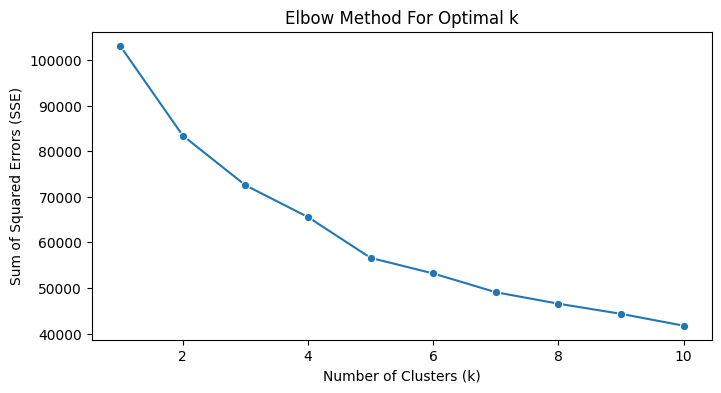

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Determine optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE for the elbow method
plt.figure(figsize=(8, 4))
sns.lineplot(x=list(k_range), y=sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method For Optimal k")
plt.show()


##  Inspecting K-Means Cluster Centroids

After fitting the final K-Means model, the **cluster centroids** are extracted and stored in a DataFrame for easy interpretation:



In [92]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
# print(centroids)
display(centroids)

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.838610,-0.462140,0.700017,-0.098782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.610754,-0.456630,0.522256,-0.074137,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.678920,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.889146,-0.462140,0.752268,-0.138722,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.891772,-0.342396,-0.827239,-0.011420,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.878879,-0.456562,-0.773002,0.003587,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.220788,2.163844,0.278296,-0.154760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.534057,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.914389,-0.225464,-0.779768,0.169341,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.709167,-0.411825,0.662477,0.050260,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.677438,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.973969,-0.439529,-0.885516,0.336732,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.681080,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.850979,-0.457484,0.708277,-0.030472,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  Fitting K-Means and Assigning Cluster Labels

The final **K-Means model** is trained using the optimal number of clusters determined from the elbow plot (in this case, `k = 5`).



In [94]:
# Fit KMeans with the chosen number of clusters
k = 5  # replace this with the optimal number from the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
X['cluster'] = kmeans.fit_predict(X)

# View clustered data
# print(X.head())
display(X.head())


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,-0.452286,-0.46214,0.016431,-1.543008,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.452286,-0.46214,0.120207,0.881916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.452286,-0.46214,0.210942,0.712698,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.344907,-0.46214,0.016431,0.594467,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.443944,-0.46214,-0.568539,-1.273457,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.595153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


##  Applying K-Means Clustering and Attaching Cluster Labels

The K-Means algorithm is applied to the preprocessed feature matrix `X` to group data points into `k = 5` clusters:



In [96]:
from sklearn.cluster import KMeans

# Define number of clusters
k = 5

# Run KMeans directly on X
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster assignments to X or df_scaled
X['cluster'] = clusters  # optional, if you want to attach it


##  2D Visualization of K-Means Clusters

A scatter plot is created to visualize the **K-Means clustering results** using two selected features from the feature matrix `X`.

###  Plot Details:

- **X-axis** and **Y-axis** represent the first two feature columns (`f1` and `f2`) in the dataset.
- Each point corresponds to a data record.
- Colors (`c=clusters`) indicate the assigned cluster using the `'viridis'` colormap.
- A colorbar is added to map cluster labels to colors.
- Plot includes gridlines and labeled axes for clarity.

###  Purpose:

- Visually examine how well the clusters are **separated** in the feature space.
- Detect **overlaps, density patterns**, or **potential misclassifications**.
- Assist in understanding the **distribution and structure** of the clustered data.

> This simple yet effective visualization helps validate the clustering results in an interpretable 2D space.


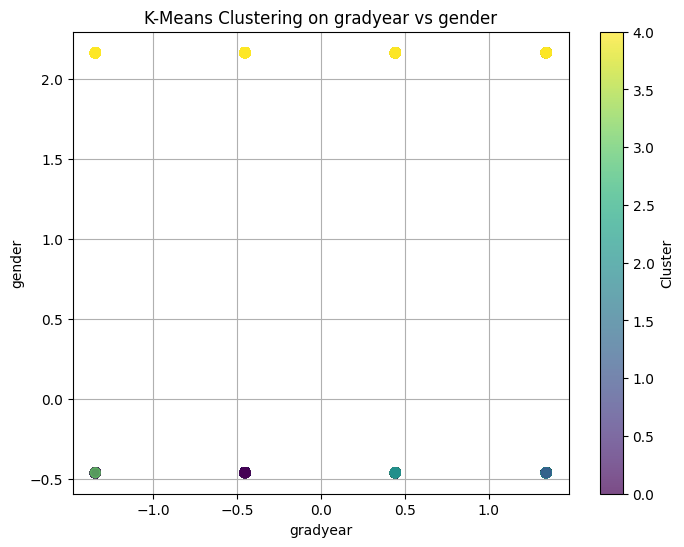

In [98]:
import matplotlib.pyplot as plt

# Choose two features from X for visualization
f1, f2 = X.columns[0], X.columns[1]

plt.figure(figsize=(8, 6))
plt.scatter(X[f1], X[f2], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title(f'K-Means Clustering on {f1} vs {f2}')
plt.xlabel(f1)
plt.ylabel(f2)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


##  3D Visualization of K-Means Clusters

A 3D scatter plot is created using **Matplotlib's `mpl_toolkits.mplot3d`** module to visualize clusters in a three-dimensional feature space.

###  Plot Components:

- **X, Y, Z axes** represent the first three features (`f1`, `f2`, `f3`) in the dataset.
- Data points are colored by **cluster assignment** (`clusters`) using the `'viridis'` colormap.
- Point size and transparency (`s=50`, `alpha=0.7`) help improve visibility in 3D space.

###  Purpose:

- Observe how well K-Means clusters are **distributed in higher dimensions**
- Detect **spatial separation, overlaps**, or **tight groupings**
- Gain deeper insights into data structure beyond 2D visualizations

###  Plot Configuration:
- Axes are labeled dynamically based on selected features.
- A descriptive title enhances readability.
- `projection='3d'` is enabled for full 3D interactivity and layout.

> 3D plots provide an intuitive and visually rich perspective of clustering results, especially when features are moderately correlated or spatially distinct.


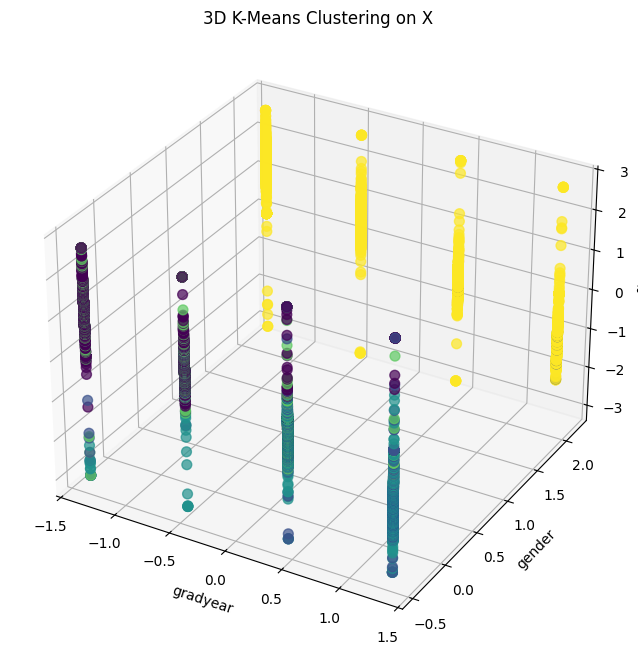

In [100]:
from mpl_toolkits.mplot3d import Axes3D

f1, f2, f3 = X.columns[:3]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[f1], X[f2], X[f3], c=clusters, cmap='viridis', s=50, alpha=0.7)

ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
plt.title('3D K-Means Clustering on X')
plt.show()


##  Clustering Quality Evaluation: Silhouette Score

The **Silhouette Score** is computed to evaluate the overall quality and consistency of the K-Means clustering result.



In [102]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, clusters)
print(f'Silhouette Score: {sil_score:.3f}')


Silhouette Score: 0.308


##  K-Means Clustering Evaluation Metrics

After performing K-Means clustering, three key metrics are computed to evaluate the **quality and effectiveness** of the clustering solution:


In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Run KMeans on X
k = 5  # or any chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Optional: Add cluster labels to df_scaled
df_scaled['cluster'] = clusters

# -----------------------------
# 📊 Performance Metrics
# -----------------------------

sil_score = silhouette_score(X, clusters)
db_score = davies_bouldin_score(X, clusters)
ch_score = calinski_harabasz_score(X, clusters)

print(f"Silhouette Score:        {sil_score:.3f}  (Higher is better, max=1)")
print(f"Davies-Bouldin Score:    {db_score:.3f}  (Lower is better, min=0)")
print(f"Calinski-Harabasz Score: {ch_score:.3f}  (Higher is better)")



Silhouette Score:        0.272  (Higher is better, max=1)
Davies-Bouldin Score:    1.513  (Lower is better, min=0)
Calinski-Harabasz Score: 4441.714  (Higher is better)


Estimated number of clusters: 121
Estimated number of noise points: 549
Silhouette Score:        0.107
Davies-Bouldin Score:    1.809
Calinski-Harabasz Score: 583.391


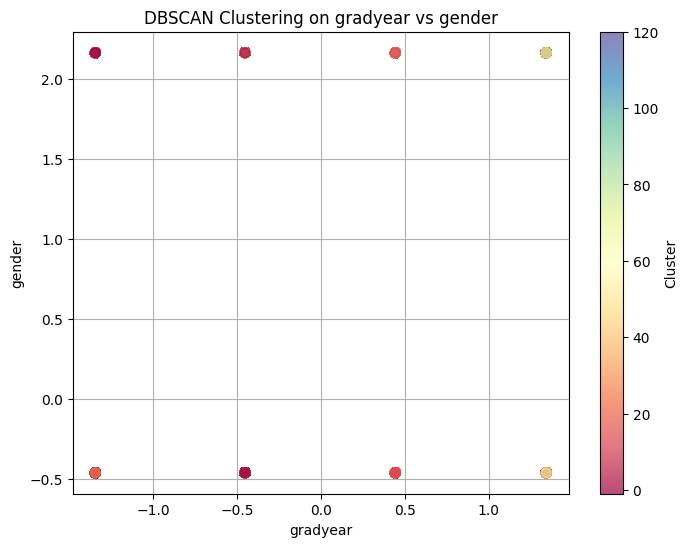

In [105]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Step 1: Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # you may need to tune these
clusters = dbscan.fit_predict(X)

# Add cluster labels to df_scaled
df_scaled['cluster'] = clusters

# Step 2: Show number of clusters (excluding noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Step 3: Metrics (only if more than 1 cluster found)
if n_clusters > 1:
    sil_score = silhouette_score(X, clusters)
    db_score = davies_bouldin_score(X, clusters)
    ch_score = calinski_harabasz_score(X, clusters)

    print(f"Silhouette Score:        {sil_score:.3f}")
    print(f"Davies-Bouldin Score:    {db_score:.3f}")
    print(f"Calinski-Harabasz Score: {ch_score:.3f}")
else:
    print("Not enough clusters to compute performance metrics.")

# Step 4: Visualization (using first 2 features)
f1, f2 = X.columns[:2]

plt.figure(figsize=(8, 6))
plt.scatter(X[f1], X[f2], c=clusters, cmap='Spectral', s=50, alpha=0.7)
plt.title(f'DBSCAN Clustering on {f1} vs {f2}')
plt.xlabel(f1)
plt.ylabel(f2)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


##  k-Distance Graph for DBSCAN Parameter Tuning

To determine a suitable `eps` (epsilon) value for the **DBSCAN algorithm**, a **k-distance graph** is plotted using the distance to each point’s 5th nearest neighbor (`k=5`), which corresponds to the typical `min_samples` value.

---

###  Methodology:

1. **Fit Nearest Neighbors**:
   - `NearestNeighbors(n_neighbors=5)` is used to compute the distances between each data point and its 5 closest neighbors.

2. **Extract 5th Nearest Distances**:
   - Only the distance to the **5th nearest neighbor** is used to identify the local density for each point.

3. **Sort Distances**:
   - The distances are sorted in ascending order to produce the "knee" or **elbow-shaped curve**.

4. **Plot the Curve**:
   - A line plot visualizes how the 5-NN distance increases across sorted points.
   - The point of **maximum curvature (elbow)** suggests an optimal `eps` value for DBSCAN.

---

###  Plot Interpretation:

- **X-axis**: Index of sorted points
- **Y-axis**: Distance to the 5th nearest neighbor
- **Elbow point**: A sharp change in slope indicates a threshold for neighborhood density; this can be used as `eps`.

> Choosing `eps` just beyond the elbow helps DBSCAN find meaningful clusters without overestimating noise.

---

###  Purpose:

- Helps **objectively estimate `eps`** rather than relying on trial-and-error
- Critical for improving DBSCAN performance, especially in high-dimensional or noisy datasets


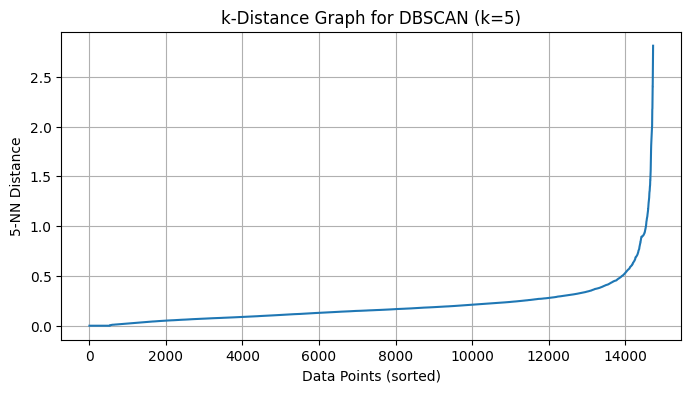

In [107]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Choose k = min_samples (commonly 4 or 5)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances to find elbow
k_distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title('k-Distance Graph for DBSCAN (k=5)')
plt.xlabel('Data Points (sorted)')
plt.ylabel('5-NN Distance')
plt.grid(True)
plt.show()


##  DBSCAN Clustering (eps = 1.4) with Evaluation and 2D Visualization

This section applies **DBSCAN**, a density-based clustering algorithm, to the feature matrix `X` using a tuned epsilon (`eps=1.4`). The process includes cluster detection, quality evaluation, and 2D visualization.



Estimated number of clusters: 20
Estimated number of noise points: 48
Silhouette Score:        0.293
Davies-Bouldin Score:    1.745
Calinski-Harabasz Score: 2002.432


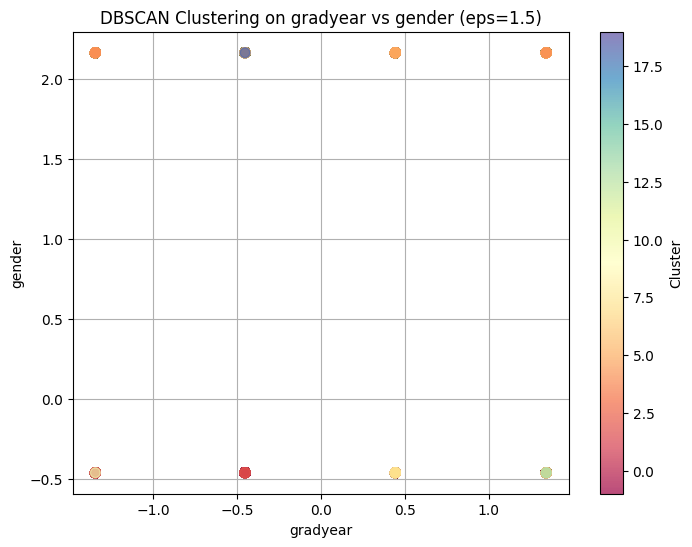

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Run DBSCAN with optimized eps
dbscan = DBSCAN(eps=1.4, min_samples=5)
clusters = dbscan.fit_predict(X)

# Assign to df_scaled for reference
df_scaled['cluster'] = clusters

# Count clusters and noise
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Performance metrics (only if valid clustering found)
if n_clusters > 1:
    sil_score = silhouette_score(X, clusters)
    db_score = davies_bouldin_score(X, clusters)
    ch_score = calinski_harabasz_score(X, clusters)

    print(f"Silhouette Score:        {sil_score:.3f}")
    print(f"Davies-Bouldin Score:    {db_score:.3f}")
    print(f"Calinski-Harabasz Score: {ch_score:.3f}")
else:
    print("Not enough clusters to compute metrics.")

# Visualize clusters using 2D scatter (first 2 features)
f1, f2 = X.columns[:2]
plt.figure(figsize=(8, 6))
plt.scatter(X[f1], X[f2], c=clusters, cmap='Spectral', s=50, alpha=0.7)
plt.title(f'DBSCAN Clustering on {f1} vs {f2} (eps=1.5)')
plt.xlabel(f1)
plt.ylabel(f2)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [110]:
Y=X.copy()

##  Agglomerative (Hierarchical) Clustering with Cluster Assignment

This section applies **Agglomerative Clustering**, a bottom-up hierarchical clustering technique, to the dataset `Y`. The results are saved with cluster labels for further analysis or visualization.

---



In [112]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Set number of clusters
k = 5

# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')  # can also try 'average', 'complete', 'single'
clusters = agglo.fit_predict(Y)

# Save to df_scaled
Y['cluster'] = clusters


In [113]:
# Metrics (only if more than 1 cluster)
if len(set(clusters)) > 1:
    sil_score = silhouette_score(Y, clusters)
    db_score = davies_bouldin_score(Y, clusters)
    ch_score = calinski_harabasz_score(Y, clusters)

    print(f"Silhouette Score:        {sil_score:.3f}")
    print(f"Davies-Bouldin Score:    {db_score:.3f}")
    print(f"Calinski-Harabasz Score: {ch_score:.3f}")
else:
    print("Not enough clusters to evaluate performance.")


Silhouette Score:        0.294
Davies-Bouldin Score:    1.255
Calinski-Harabasz Score: 4632.747


##  2D Visualization of Agglomerative Clustering Results

This scatter plot displays the outcome of **Agglomerative Clustering** (hierarchical) using the first two features of the dataset.



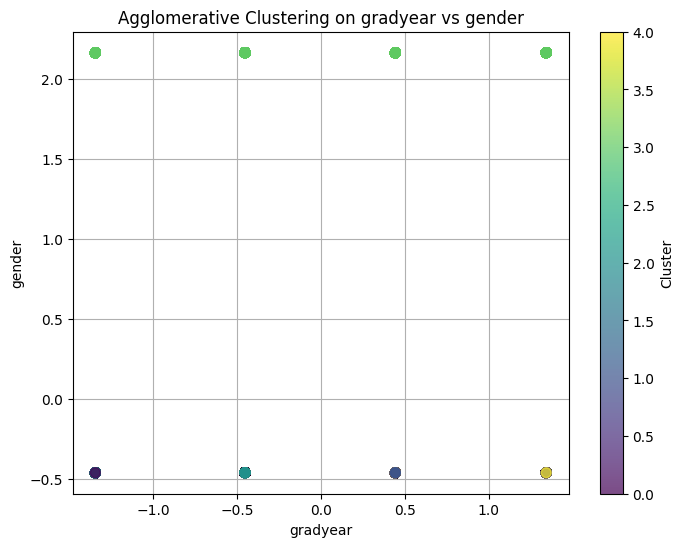

In [115]:
import matplotlib.pyplot as plt

# Choose two features
f1, f2 = X.columns[:2]

plt.figure(figsize=(8, 6))
plt.scatter(X[f1], X[f2], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title(f'Agglomerative Clustering on {f1} vs {f2}')
plt.xlabel(f1)
plt.ylabel(f2)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


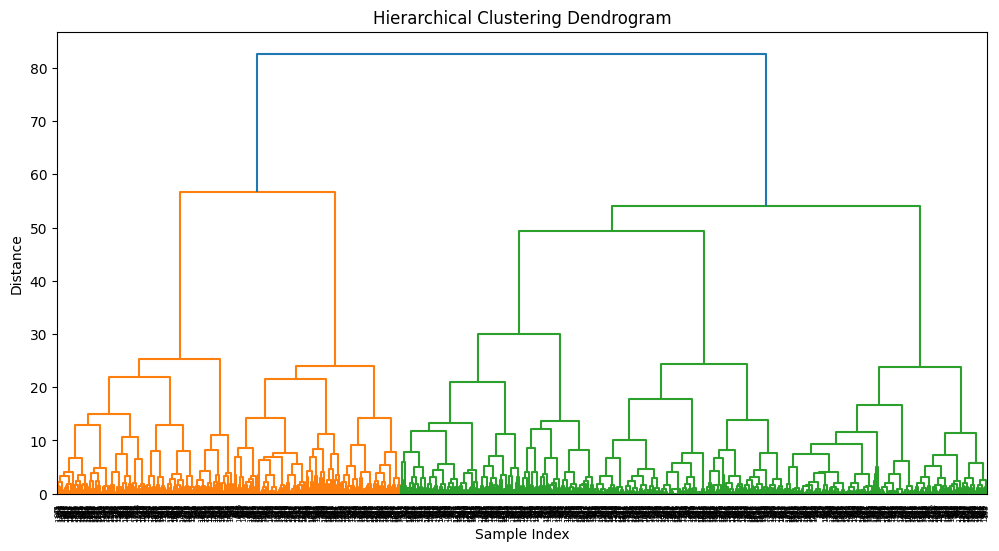

In [116]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Use a sample if dataset is large
sample_size = 1500
sample_X = X.iloc[:sample_size]

linked = linkage(sample_X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


##  Dimensionality Reduction with PCA (90% Variance Retention)

To reduce the dimensionality of the dataset while preserving most of its informational content, **Principal Component Analysis (PCA)** is applied.

---



In [118]:
from sklearn.decomposition import PCA

# Apply PCA to retain 90% of the information
pca = PCA(n_components=0.90, random_state=42)
df_pca_90 = pca.fit_transform(df_scaled)

# Convert to DataFrame for further use
df_pca_90 = pd.DataFrame(df_pca_90, columns=[f'PC{i+1}' for i in range(df_pca_90.shape[1])])

# Optional: check how many components were selected
print(f"PCA retained {df_pca_90.shape[1]} components to preserve 90% variance.")


PCA retained 4 components to preserve 90% variance.


##  Elbow Method After PCA: Determining Optimal Number of Clusters

After reducing the dataset using **PCA (90% variance retention)**, the **Elbow Method** is applied to identify the optimal number of clusters for K-Means.

---



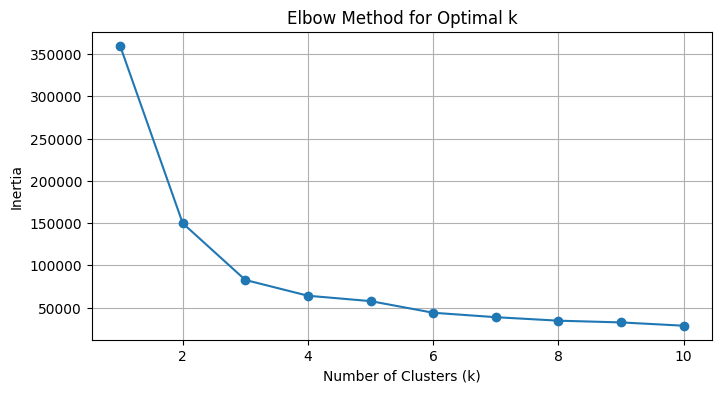

In [120]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Drop 'Cluster' column if it already exists (just in case)
X = df_pca_90.drop(columns=['Cluster'], errors='ignore')

# Range of k values to try
k_range = range(1, 11)
inertias = []

# Fit KMeans for each k and store the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow chart
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


##  K-Means Clustering on PCA-Reduced Features with Performance Evaluation

This section applies **K-Means clustering** on the **PCA-transformed dataset** (`df_pca_90`) and evaluates the resulting clusters using standard metrics.

---



In [122]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Step 1: Fit KMeans model
k = 4  # You can change this based on Elbow or Silhouette method
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca_90)

# Step 2: Add cluster labels to the PCA DataFrame
df_pca_90['Cluster'] = cluster_labels

# Step 3: Evaluate clustering (use sample to save memory)
sample = df_pca_90.sample(n=1000, random_state=42)
X_sample = sample.drop('Cluster', axis=1)
y_sample = sample['Cluster']

# Step 4: Print clustering performance metrics
print("Clustering Performance:")
print("Silhouette Score:", silhouette_score(X_sample, y_sample))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_sample, y_sample))
print("Davies-Bouldin Index:", davies_bouldin_score(X_sample, y_sample))

# Optional: View cluster counts
print("\nCluster Counts:")
print(df_pca_90['Cluster'].value_counts())


Clustering Performance:
Silhouette Score: 0.4473602910270239
Calinski-Harabasz Index: 1586.5240623109826
Davies-Bouldin Index: 0.9217898541020717

Cluster Counts:
Cluster
1    4631
0    4302
3    2978
2    2823
Name: count, dtype: int64


##  2D Visualization of K-Means Clusters (PCA Projection)

This scatter plot visualizes the results of **K-Means clustering** applied to the **PCA-transformed dataset**, projected into two dimensions (`PC1` and `PC2`).

---

###  Plot Details:

- **X-axis**: First principal component (`PC1`)
- **Y-axis**: Second principal component (`PC2`)
- **Color**: Represents cluster assignment (`Cluster`) using the `Set2` color palette
- **Marker size** and **transparency** (`s=50`, `alpha=0.7`) help improve readability and overlap detection

---

###  Purpose:

- Provide a **visual validation** of how well-separated the clusters are in a 2D space
- Help identify:
  - **Cluster boundaries**
  - **Overlapping regions**
  - **Outliers or noise points**
- Assist in interpreting and profiling di


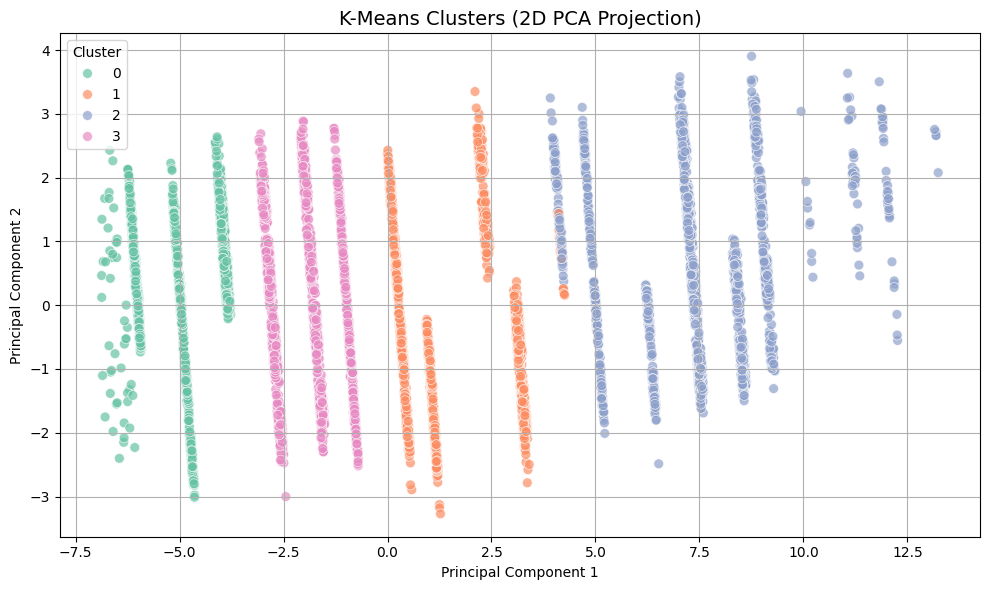

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the first two principal components are available
df_plot = df_pca_90.copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2',
    s=50,
    alpha=0.7
)
plt.title('K-Means Clusters (2D PCA Projection)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Step 1: Fit KMeans model
k = 5  # You can change this based on Elbow or Silhouette method
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca_90)

# Step 2: Add cluster labels to the PCA DataFrame
df_pca_90['Cluster'] = cluster_labels

# Step 3: Evaluate clustering (use sample to save memory)
sample = df_pca_90.sample(n=1000, random_state=42)
X_sample = sample.drop('Cluster', axis=1)
y_sample = sample['Cluster']

# Step 4: Print clustering performance metrics
print("Clustering Performance:")
print("Silhouette Score:", silhouette_score(X_sample, y_sample))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_sample, y_sample))
print("Davies-Bouldin Index:", davies_bouldin_score(X_sample, y_sample))

# Optional: View cluster counts
print("\nCluster Counts:")
print(df_pca_90['Cluster'].value_counts())


Clustering Performance:
Silhouette Score: 0.42518611006862467
Calinski-Harabasz Index: 1356.0369985945674
Davies-Bouldin Index: 0.8625233223369471

Cluster Counts:
Cluster
2    4631
0    4302
1    2823
3    1928
4    1050
Name: count, dtype: int64


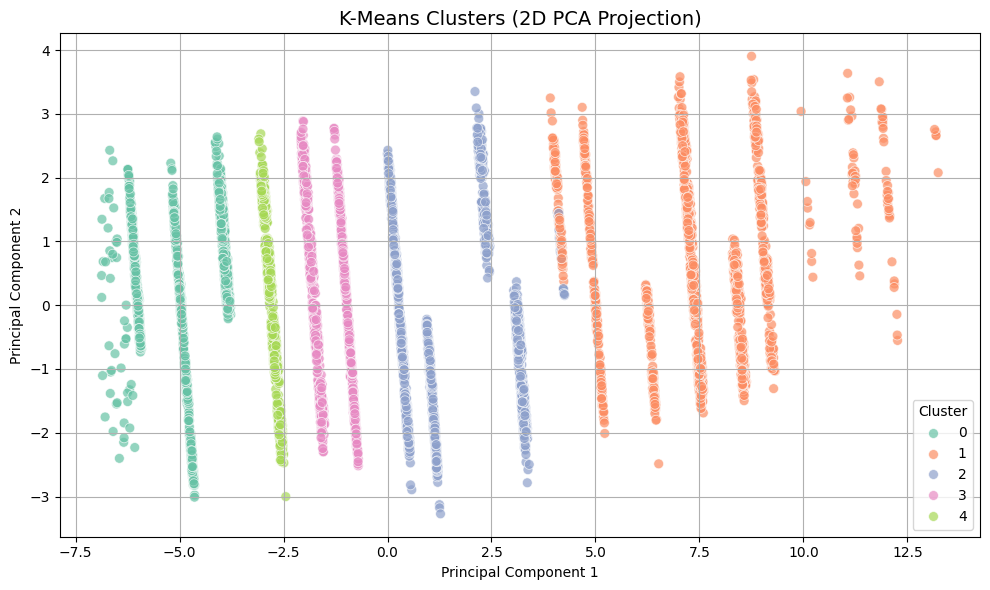

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the first two principal components are available
df_plot = df_pca_90.copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2',
    s=50,
    alpha=0.7
)
plt.title('K-Means Clusters (2D PCA Projection)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [127]:
df_pca_90.head()

,PC1,PC2,PC3,PC4,Cluster
0,-5.991266,-0.284722,0.496678,-1.188480,0
1,-4.941440,-0.207437,-1.205350,1.091489,0
2,-3.860970,0.094437,-0.572983,0.135633,0
3,-6.024063,0.148603,-0.327007,-0.511872,0
4,-2.758965,-0.692185,-0.594557,0.996335,4


In [128]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Step 1: Use PCA-reduced data only (drop any old labels)
X = df_pca_90.drop(columns=['Cluster', 'DBSCAN_Cluster'], errors='ignore')

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
df_pca_90['DBSCAN_Cluster'] = dbscan_labels

# Step 3: Filter out noise and take a sample
mask = dbscan_labels != -1
X_filtered = X[mask]
labels_filtered = dbscan_labels[mask]

# SAMPLE to prevent memory error
sample_size = min(1000, len(X_filtered))
X_sample = X_filtered.sample(n=sample_size, random_state=42)
y_sample = df_pca_90.loc[X_sample.index, 'DBSCAN_Cluster']

# Step 4: Evaluate performance
if len(set(y_sample)) > 1:
    print("Performance Metrics (sampled, excluding noise):")
    print("Silhouette Score:", silhouette_score(X_sample, y_sample))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X_sample, y_sample))
    print("Davies-Bouldin Index:", davies_bouldin_score(X_sample, y_sample))
else:
    print("Not enough clusters (after noise removal) to evaluate.")

# Step 5: Cluster counts (including noise)
unique, counts = np.unique(dbscan_labels, return_counts=True)
print("\nDBSCAN Cluster Counts:")
print(dict(zip(unique, counts)))


Performance Metrics (sampled, excluding noise):
Silhouette Score: 0.27474172251603535
Calinski-Harabasz Index: 640.4952999960398
Davies-Bouldin Index: 0.9480010554291793

DBSCAN Cluster Counts:
{0: 5352, 1: 1928, 2: 6819, 3: 271, 4: 364}


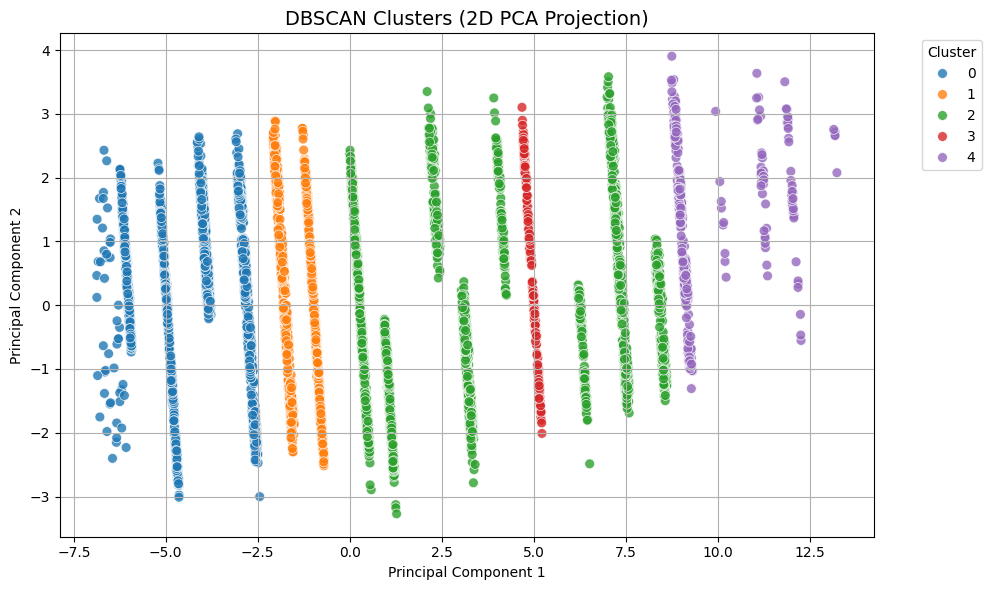

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'PC1', 'PC2' and 'DBSCAN_Cluster' exist
df_plot = df_pca_90.copy()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='DBSCAN_Cluster',
    palette='tab10',  # You can change to 'Set2', 'tab20', etc.
    s=50,
    alpha=0.8,
    legend='full'
)

plt.title('DBSCAN Clusters (2D PCA Projection)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


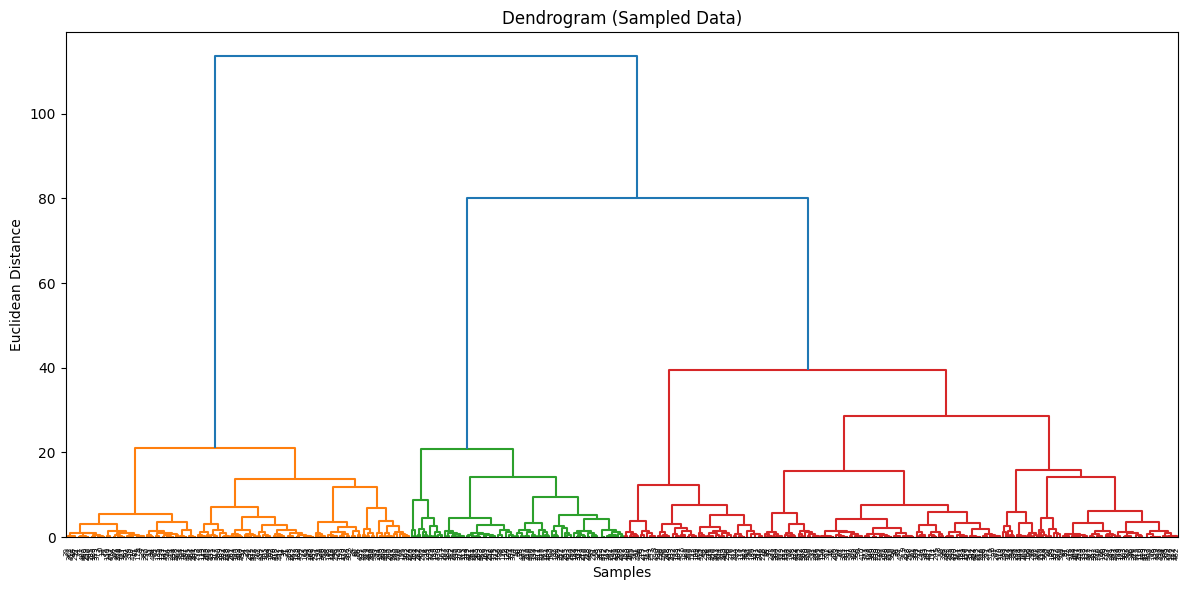

In [130]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data (remove old cluster labels if needed)
X = df_pca_90.drop(columns=['Cluster', 'DBSCAN_Cluster'], errors='ignore')

# Step 2: Plot the dendrogram (on a sample to avoid memory issues)
sample = X.sample(n=500, random_state=42)  # Reduce size for dendrogram clarity

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(sample, method='ward'))
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()


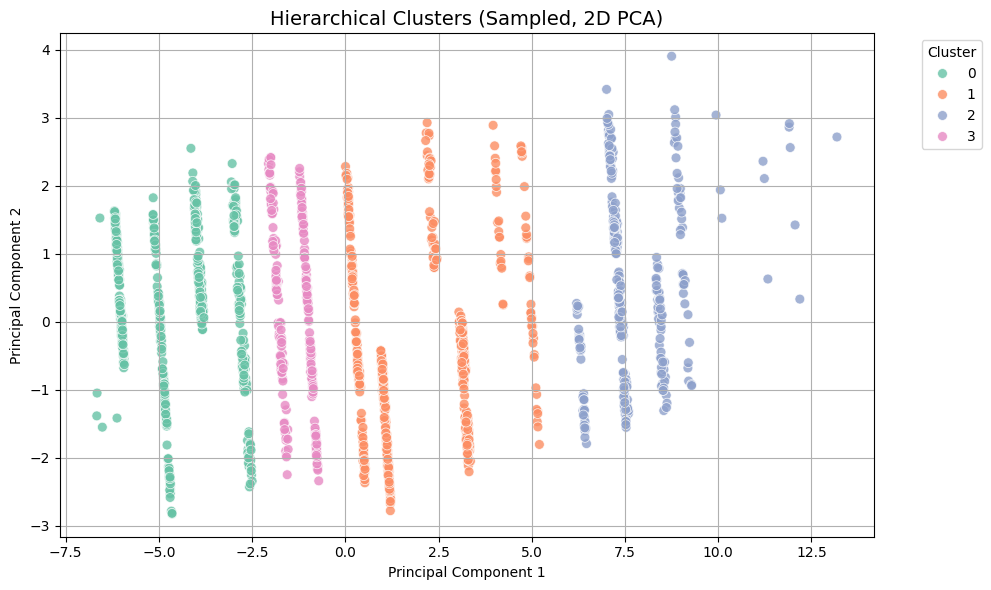

In [131]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sample the data (to avoid memory overload)
X_sample = X.sample(n=2000, random_state=42)

# Step 2: Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_sample)

# Step 3: Plot the clusters in 2D
plot_df = X_sample.copy()
plot_df['HC_Cluster'] = hc_labels
plot_df[['PC1', 'PC2']] = df_pca_90.loc[plot_df.index, ['PC1', 'PC2']]  # keep PC1 and PC2 for plotting

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='HC_Cluster',
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Hierarchical Clusters (Sampled, 2D PCA)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [132]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Optional: filter out if only one cluster detected
if len(set(hc_labels)) > 1:
    print("Hierarchical Clustering Performance (on sampled data):")
    print("Silhouette Score:", silhouette_score(X_sample, hc_labels))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X_sample, hc_labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(X_sample, hc_labels))
else:
    print("Only one cluster found — metrics cannot be computed.")


Hierarchical Clustering Performance (on sampled data):
Silhouette Score: 0.46068347138477533
Calinski-Harabasz Index: 3118.065842647038
Davies-Bouldin Index: 0.8011365720535851


## c)	Use the Anime Recommendations dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab.

### https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data



### i.	Download the dataset from above link and load it into your Python environment.
### ii.	Perform the EDA and do the visualizations.
### iii.	Check the distributions/skewness in the variables and do the transformations if required.
### iv.	Create a content based Recommender system 



## 📥 Loading and Previewing Anime Datasets

This step loads two CSV files essential for building an **anime recommendation system**: one containing anime metadata and the other capturing user ratings.



In [134]:
import pandas as pd

# Load the anime dataset
anime_df = pd.read_csv(r'F:\naveen personal work\iitg\python_final\unsupervised_machine_learning\\anime.csv')

# Load the rating dataset
rating_df = pd.read_csv(r'F:\naveen personal work\iitg\python_final\unsupervised_machine_learning\\rating.csv')

# Display the first few rows of each dataset
print("Anime DataFrame:")
display(anime_df.head())

print("\nRating DataFrame:")
display(rating_df.head())


Anime DataFrame:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266



Rating DataFrame:


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


##  Dataset Dimensions

The `.shape` attribute is used to inspect the **dimensions** (rows × columns) of both the `anime_df` and `rating_df` DataFrames.


In [136]:
print("Anime Dataframe:",anime_df.shape)
print("Rating Dataframe:",rating_df.shape)

Anime Dataframe: (12294, 7)
Rating Dataframe: (7813737, 3)


##  Merging Anime and Rating Datasets

The `anime_df` and `rating_df` DataFrames are merged using the `anime_id` column as the **common key** to create a unified dataset.



In [138]:
# Merge anime_df and rating_df on the 'anime_id' column
merged_df = pd.merge(rating_df, anime_df, on='anime_id', how='inner')


##  Preview of Merged Anime-Rating Dataset

After merging the `anime_df` and `rating_df` on the `anime_id` column, the first few rows of the resulting DataFrame `merged_df` are displayed to verify the structure and content:



In [140]:

# Display the first few rows of the merged DataFrame
display(merged_df.head())


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395


##  Dimensions of Merged Dataset

The `.shape` attribute is used to display the total number of rows and columns in the merged DataFrame (`merged_df`):


In [142]:
merged_df.shape

(7813727, 9)

##  Structural Summary of Merged Dataset

The `.info()` method is used to provide a concise summary of the `merged_df` DataFrame, offering key insights into the structure and integrity of the data:


In [144]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  int64  
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 536.5+ MB


##  Cleaning Ratings and Calculating Average User Rating

This step improves the clarity of the dataset and filters out irrelevant or invalid user ratings (specifically `-1`, which typically means "not rated").



In [146]:
# Rename columns for clarity (optional)
merged_df = merged_df.rename(columns={'rating_x': 'user_rating', 'rating_y': 'anime_avg_rating'})

# Filter out invalid user ratings
valid_user_ratings = merged_df[merged_df['user_rating'] != -1]

# Calculate average user rating
average_user_rating = valid_user_ratings['user_rating'].mean()

print(f"Average user rating (excluding -1): {average_user_rating:.2f}")


Average user rating (excluding -1): 7.81


##  IMDb-Style Weighted Rating for Anime Recommendation

This section calculates a **weighted score** for each anime based on the number of user ratings and their average, inspired by IMDb’s ranking formula. The goal is to highlight high-quality anime that are both **popular and well-rated**.


In [148]:
import pandas as pd

# Step 1: Clean column names
anime_df.columns = anime_df.columns.str.strip()
rating_df.columns = rating_df.columns.str.strip()

# Step 2: Merge datasets
merged_df = pd.merge(rating_df, anime_df, on="anime_id", how="inner")

# Step 3: Rename columns for clarity
merged_df = merged_df.rename(columns={'rating_x': 'user_rating', 'rating_y': 'anime_avg_rating'})

# Step 4: Calculate vote counts and average ratings per anime
vote_stats = merged_df.groupby('anime_id').agg(
    num_votes=('user_rating', 'count'),
    avg_rating=('user_rating', 'mean')
).reset_index()

# Step 5: Compute C and m
C = vote_stats['avg_rating'].mean()  # Global average rating
m = vote_stats['num_votes'].quantile(0.80)  # 80th percentile vote count as threshold

# Step 6: Filter qualified anime (at least m votes)
qualified = vote_stats[vote_stats['num_votes'] >= m].copy()

# Step 7: Compute IMDb-style weighted score
qualified['weighted_score'] = (
    (qualified['num_votes'] / (qualified['num_votes'] + m)) * qualified['avg_rating']
    + (m / (qualified['num_votes'] + m)) * C
)

# Step 8: Merge with anime name
qualified = qualified.merge(anime_df[['anime_id', 'name']], on='anime_id')

# Step 9: Sort and display top results
final_result = qualified.sort_values(by='weighted_score', ascending=False)
display(final_result[['name', 'weighted_score', 'avg_rating', 'num_votes']].head(10))


,name,weighted_score,avg_rating,num_votes
1293,Steins;Gate,7.994081,8.126796,19283
994,Fullmetal Alchemist: Brotherhood,7.926536,8.028933,24574
917,Clannad: After Story,7.702300,7.835275,17854
780,Code Geass: Hangyaku no Lelouch R2,7.668882,7.765943,24242
1462,Hunter x Hunter (2011),7.651006,7.924082,8575
695,Tengen Toppa Gurren Lagann,7.590462,7.709572,19337
623,Code Geass: Hangyaku no Lelouch,7.558871,7.641244,27718
1961,Shigatsu wa Kimi no Uso,7.502392,7.740262,9448
605,Death Note,7.499102,7.556177,39340
0,Cowboy Bebop,7.417092,7.558514,15509


##  Top 10 Anime by IMDb-Style Weighted Rating

The top 10 anime titles are extracted from the `final_result` DataFrame, which ranks anime based on a **weighted score** combining average user rating and vote count.


In [150]:
display(final_result.head(10))  # Top 10 animes


,anime_id,num_votes,avg_rating,weighted_score,name
1293,9253,19283,8.126796,7.994081,Steins;Gate
994,5114,24574,8.028933,7.926536,Fullmetal Alchemist: Brotherhood
917,4181,17854,7.835275,7.702300,Clannad: After Story
780,2904,24242,7.765943,7.668882,Code Geass: Hangyaku no Lelouch R2
1462,11061,8575,7.924082,7.651006,Hunter x Hunter (2011)
695,2001,19337,7.709572,7.590462,Tengen Toppa Gurren Lagann
623,1575,27718,7.641244,7.558871,Code Geass: Hangyaku no Lelouch
1961,23273,9448,7.740262,7.502392,Shigatsu wa Kimi no Uso
605,1535,39340,7.556177,7.499102,Death Note
0,1,15509,7.558514,7.417092,Cowboy Bebop


##  Top 10 TV Anime by IMDb-Style Weighted Rating

This step filters the overall top-rated anime to show only those with the type `'TV'`, i.e., **television series**, and displays the top 10 based on weighted score.



In [152]:
top_tv = final_result.merge(anime_df[['anime_id', 'type']], on='anime_id')
top_tv = top_tv[top_tv['type'] == 'TV']
display(top_tv.head(10))


,anime_id,num_votes,avg_rating,weighted_score,name,type
0,9253,19283,8.126796,7.994081,Steins;Gate,TV
1,5114,24574,8.028933,7.926536,Fullmetal Alchemist: Brotherhood,TV
2,4181,17854,7.835275,7.702300,Clannad: After Story,TV
3,2904,24242,7.765943,7.668882,Code Geass: Hangyaku no Lelouch R2,TV
4,11061,8575,7.924082,7.651006,Hunter x Hunter (2011),TV
5,2001,19337,7.709572,7.590462,Tengen Toppa Gurren Lagann,TV
6,1575,27718,7.641244,7.558871,Code Geass: Hangyaku no Lelouch,TV
7,23273,9448,7.740262,7.502392,Shigatsu wa Kimi no Uso,TV
8,1535,39340,7.556177,7.499102,Death Note,TV
9,1,15509,7.558514,7.417092,Cowboy Bebop,TV


##  Top 10 Action Anime by IMDb-Style Weighted Rating

This section filters the final ranked dataset to include only anime titles that belong to the **Action** genre, and displays the top 10 based on their weighted score.


In [154]:
top_action = final_result.merge(anime_df[['anime_id', 'genre']], on='anime_id')
top_action = top_action[top_action['genre'].str.contains('Action', na=False)]
display(top_action.head(10))


,anime_id,num_votes,avg_rating,weighted_score,name,genre
1,5114,24574,8.028933,7.926536,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
3,2904,24242,7.765943,7.668882,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ..."
4,11061,8575,7.924082,7.651006,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power"
5,2001,19337,7.709572,7.590462,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi"
6,1575,27718,7.641244,7.558871,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super..."
9,1,15509,7.558514,7.417092,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
12,918,4974,7.775231,7.343637,Gintama,"Action, Comedy, Historical, Parody, Samurai, S..."
17,2251,11070,7.473803,7.283332,Baccano!,"Action, Comedy, Historical, Mystery, Seinen, S..."
19,11741,12047,7.439279,7.265209,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller"
20,30276,13374,7.415358,7.258860,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ..."


##  Genre Popularity Analysis by User Ratings

This section evaluates the **popularity of anime genres** by counting how many user ratings each genre has received across the dataset. The result is visualized using a bar chart.


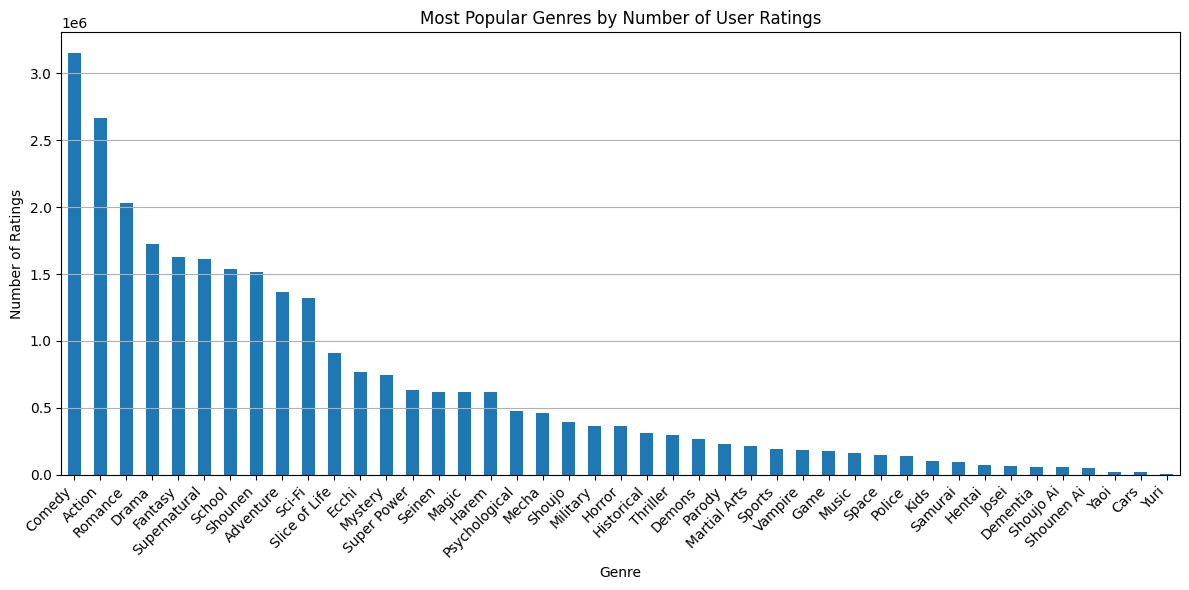

In [156]:
"""import pandas as pd
import matplotlib.pyplot as plt

# Load data
anime_df = pd.read_csv("anime.csv")
rating_df = pd.read_csv("rating.csv")

# Clean column names
anime_df.columns = anime_df.columns.str.strip()
rating_df.columns = rating_df.columns.str.strip()

# Merge full data to retain genre
merged_df = pd.merge(rating_df, anime_df, on="anime_id", how="inner")

# Rename for clarity
merged_df = merged_df.rename(columns={'rating_x': 'user_rating'})
"""
# Filter valid ratings
merged_df = merged_df[merged_df['user_rating'] != -1]

# Ensure genre is not null and split it
merged_df = merged_df.dropna(subset=['genre']).copy()
merged_df['genre'] = merged_df['genre'].str.split(', ')
merged_df = merged_df.explode('genre')

# Count number of ratings per genre
genre_counts = merged_df['genre'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Most Popular Genres by Number of User Ratings')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


##  Genre Popularity by Total Member Count

This section evaluates the popularity of anime genres based on their **cumulative member count** — a proxy for how many users have listed an anime as "watched," "plan to watch," or "favorited."


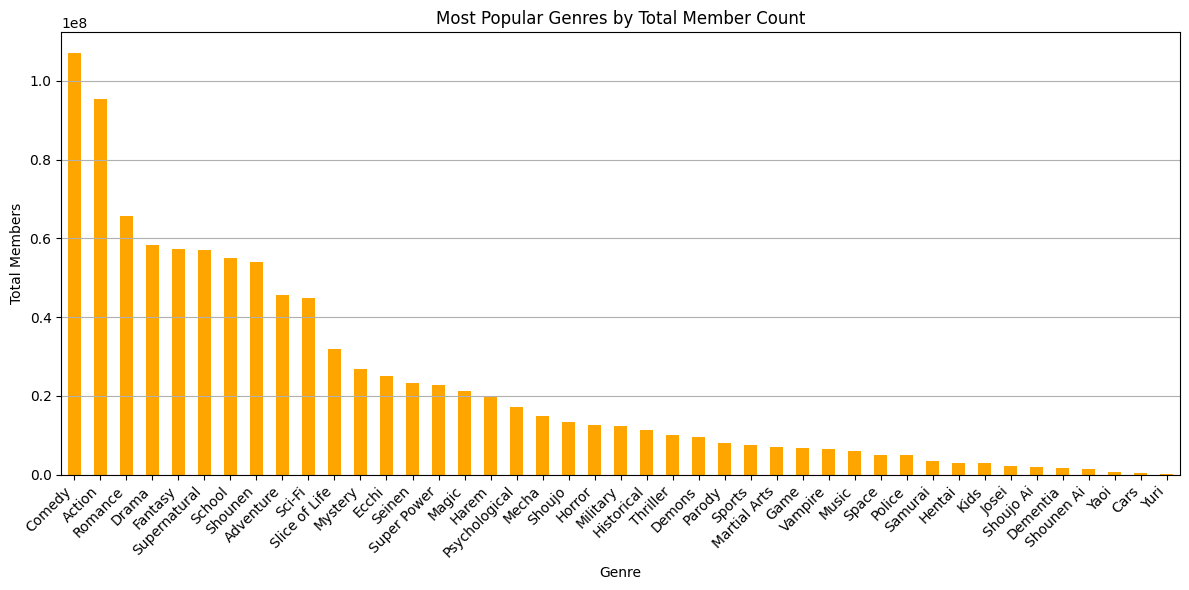

In [158]:
""" import pandas as pd
import matplotlib.pyplot as plt

# Load data
anime_df = pd.read_csv('anime.csv')

# Clean column names
anime_df.columns = anime_df.columns.str.strip()
"""
# Drop rows with missing genres
anime_genre_df = anime_df[['anime_id', 'genre', 'members']].dropna(subset=['genre'])

# Split multiple genres and explode into separate rows
anime_genre_df['genre'] = anime_genre_df['genre'].str.split(', ')
anime_genre_df = anime_genre_df.explode('genre')

# Sum of members per genre
genre_member_popularity = anime_genre_df.groupby('genre')['members'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
genre_member_popularity.plot(kind='bar', color='orange')
plt.title('Most Popular Genres by Total Member Count')
plt.xlabel('Genre')
plt.ylabel('Total Members')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


##  Genre Popularity vs. Average Rating

This scatter plot provides a two-dimensional comparison of anime genres based on:

- **Total Members** (popularity)
- **Average Rating** (perceived quality)



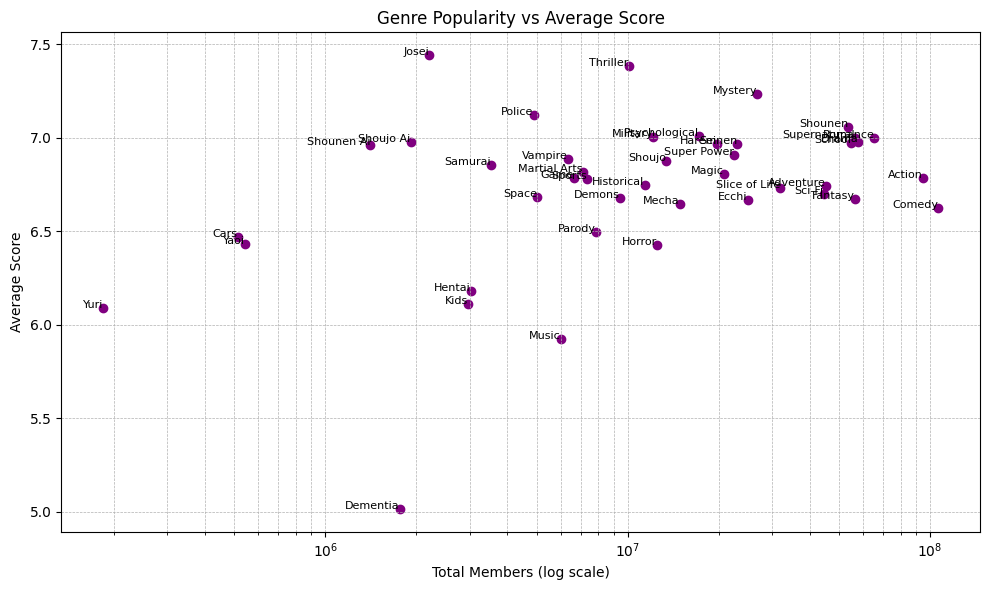

In [160]:
""" import pandas as pd
import matplotlib.pyplot as plt

# Load data
anime_df = pd.read_csv('anime.csv')

# Clean column names
anime_df.columns = anime_df.columns.str.strip()
"""
# Drop missing values
df = anime_df[['genre', 'rating', 'members']].dropna()

# Explode genres
df['genre'] = df['genre'].str.split(', ')
df = df.explode('genre')

# Group by genre: calculate average score and total members
genre_stats = df.groupby('genre').agg(
    average_score=('rating', 'mean'),
    total_members=('members', 'sum')
).reset_index()

# Plot: Average Score vs Total Members (log scale for clarity)
plt.figure(figsize=(10, 6))
plt.scatter(genre_stats['total_members'], genre_stats['average_score'], color='purple')

# Add genre labels to points
for i, row in genre_stats.iterrows():
    plt.text(row['total_members'], row['average_score'], row['genre'], fontsize=8, ha='right')

plt.xscale('log')  # log scale helps spread large member counts
plt.xlabel('Total Members (log scale)')
plt.ylabel('Average Score')
plt.title('Genre Popularity vs Average Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


##  Top 10 Highest-Rated Anime (Raw Ratings)

This step filters and ranks anime titles based solely on their **average user rating**, regardless of vote count or popularity.



In [162]:
""" import pandas as pd

# Load dataset
anime_df = pd.read_csv('anime.csv')

# Clean column names
anime_df.columns = anime_df.columns.str.strip()
"""
# Drop rows without a rating
scored_anime = anime_df.dropna(subset=['rating'])

# Sort by average score descending
top_anime = scored_anime.sort_values(by='rating', ascending=False)

# Display top N anime
print(top_anime[['name', 'rating', 'genre', 'type']].head(10))


                                          name  rating  \
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00   
10400              Spoon-hime no Swing Kitchen    9.60   
9595                          Mogura no Motoro    9.50   
0                               Kimi no Na wa.    9.37   
9078                              Kahei no Umi    9.33   
1             Fullmetal Alchemist: Brotherhood    9.26   
2                                     Gintama°    9.25   
10786          Yakusoku: Africa Mizu to Midori    9.25   
3                                  Steins;Gate    9.17   
4                                Gintama&#039;    9.16   

                                                   genre   type  
10464                                     Comedy, Parody  Movie  
10400                                    Adventure, Kids     TV  
9595                                       Slice of Life  Movie  
0                   Drama, Romance, School, Supernatural  Movie  
9078                           

##  Top 5 Anime by Average User Score (Bar Chart)

This section visualizes the top 5 anime titles with the highest average user ratings using a horizontal bar chart.


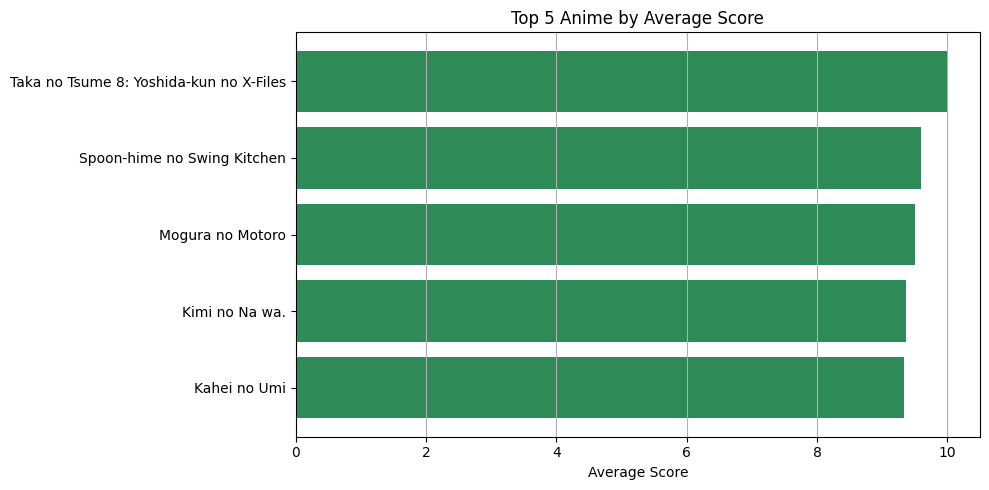

In [164]:
""" import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
anime_df = pd.read_csv('anime.csv')

# Clean column names
anime_df.columns = anime_df.columns.str.strip()
"""
# Drop rows without a rating and sort by rating
top_anime = anime_df.dropna(subset=['rating']).sort_values(by='rating', ascending=False)

# Select top 5 anime
top_5 = top_anime[['name', 'rating']].head(5)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_5['name'], top_5['rating'], color='seagreen')
plt.xlabel('Average Score')
plt.title('Top 5 Anime by Average Score')
plt.gca().invert_yaxis()  # Highest score at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


##  Top 5 Anime by Average Rating (Horizontal Bar Chart)

This visualization highlights the five highest-rated anime titles based on average user scores from the dataset.



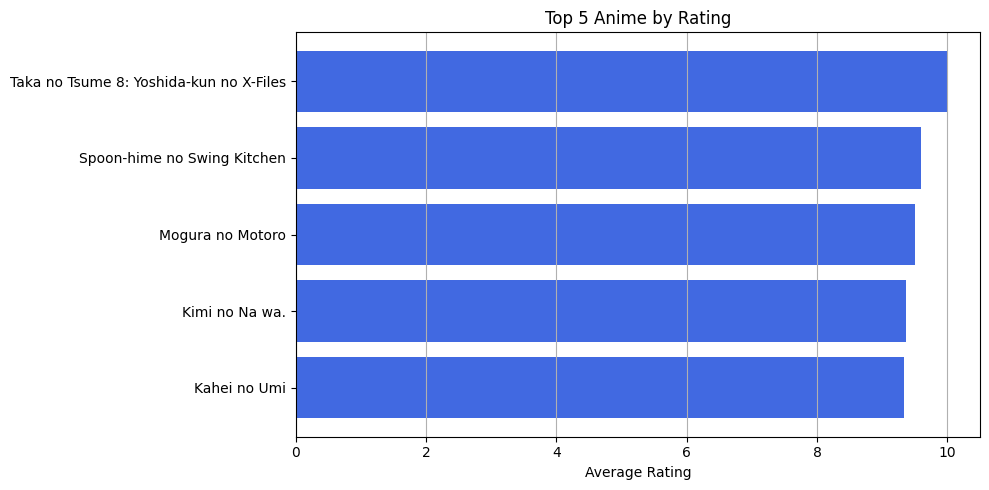

In [166]:
""" import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
anime_df = pd.read_csv('anime.csv')

# Clean column names
anime_df.columns = anime_df.columns.str.strip()
"""
# Drop rows without a rating and sort by rating (descending)
sorted_anime = anime_df.dropna(subset=['rating']).sort_values(by='rating', ascending=False)

# Select top 5 anime
top_5 = sorted_anime[['name', 'rating']].head(5)

# Plot horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_5['name'], top_5['rating'], color='royalblue')
plt.xlabel('Average Rating')
plt.title('Top 5 Anime by Rating')
plt.gca().invert_yaxis()  # Highest rating on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

##  Top 15 Anime Recommendations (Hybrid Scoring Model)

This approach ranks anime using a **hybrid scoring system** that balances:

-  **IMDb-style weighted rating**
-  **Normalized popularity score** (based on member count)



In [169]:
"""# Re-import and process everything from the beginning due to kernel reset

import pandas as pd

# Load anime data
anime_df = pd.read_csv("/mnt/data/anime.csv")
"""
# Drop rows with missing ratings
anime_df = anime_df.dropna(subset=["rating"])
anime_df["members"] = anime_df["members"].astype(int)

# Compute mean rating (C) and 60th percentile of members (m)
C = anime_df["rating"].mean()
m = anime_df["members"].quantile(0.60)

# Filter qualified animes
qualified = anime_df[anime_df["members"] >= m].copy()

# Normalize popularity score
qualified["popularity_score"] = (qualified["members"] - qualified["members"].min()) / \
                                 (qualified["members"].max() - qualified["members"].min())

# Weighted rating function
def weighted_rating(x, m=m, C=C):
    v = x["members"]
    R = x["rating"]
    return (v / (v + m)) * R + (m / (v + m)) * C

qualified["weighted_rating"] = qualified.apply(weighted_rating, axis=1)
qualified["final_score"] = 0.5 * qualified["weighted_rating"] + 0.5 * qualified["popularity_score"]

# Display top 15 anime recommendations
top_recommendations = qualified.sort_values("final_score", ascending=False)[
    ["name", "rating", "members", "final_score"]
].head(15)

top_recommendations.reset_index(drop=True, inplace=True)
top_recommendations


,name,rating,members,final_score
0,Fullmetal Alchemist: Brotherhood,9.26,793665,5.016075
1,Steins;Gate,9.17,673572,4.910987
2,Death Note,8.71,1013917,4.851854
3,Code Geass: Hangyaku no Lelouch R2,8.98,572888,4.765670
4,Hunter x Hunter (2011),9.13,425855,4.765322
5,Code Geass: Hangyaku no Lelouch,8.83,715151,4.762556
6,Kimi no Na wa.,9.37,200630,4.762444
7,Clannad: After Story,9.06,456749,4.746413
8,Shingeki no Kyojin,8.54,896229,4.708512
9,Sen to Chihiro no Kamikakushi,8.93,466254,4.686673


##  Top 15 Anime: Combined Rating + Popularity Score

This chart visualizes the final anime recommendations ranked by a hybrid metric that balances:

-  IMDb-style weighted user ratings
-  Normalized popularity (based on total members)


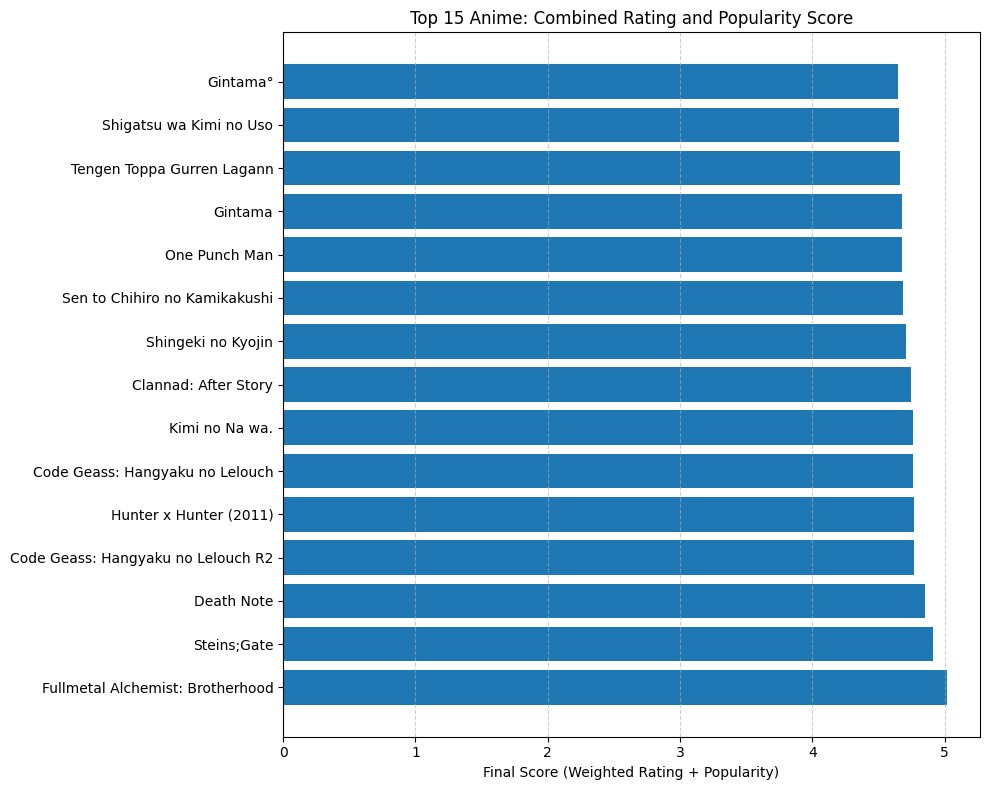

In [171]:

# Sort in descending order for bar chart
top_recommendations_sorted_desc = top_recommendations.sort_values(by="final_score", ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_recommendations["name"], top_recommendations["final_score"])
plt.xlabel("Final Score (Weighted Rating + Popularity)")
plt.title("Top 15 Anime: Combined Rating and Popularity Score")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Content Based 

Now lets make a recommendations based on the Anime’s plot summaries given in the overview column. So if our user gives us a Anime title, our goal is to recommend movies that share similar plot summaries.

In [174]:
# movies_cleaned_df.head(1)['overview']

merged_df.head(1)['genre']

47    Action
Name: genre, dtype: object

##  Genre Vectorization Using TF-IDF

To prepare for **content-based filtering**, the anime genres are transformed into **numerical features** using the **TF-IDF (Term Frequency-Inverse Document Frequency)** method.



In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Downsize the input if needed (only for testing)
merged_df = merged_df.sample(n=2000, random_state=42)

# Clean 'genre'
merged_df['genre'] = merged_df['genre'].fillna('')

# Memory-efficient TF-IDF vectorizer
tfv = TfidfVectorizer(
    min_df=10,               # Skip rare terms
    max_features=2000,       # Limit total number of terms
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),      # Unigrams and bigrams only
    stop_words='english'
)

# Transform genres into TF-IDF matrix
tfidf_matrix = tfv.fit_transform(merged_df['genre'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (2000, 40)


##  Similarity Computation Using Sigmoid Kernel

To compute **pairwise similarity** between anime based on genre features, the **sigmoid kernel** is applied to the TF-IDF matrix.



In [178]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

##  Reverse Mapping: Anime Name to Index

To efficiently retrieve similarity scores for a given anime title, we create a **reverse mapping** between anime `name` and its corresponding row index in the dataset.


In [180]:
# Reverse mapping of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['name']).drop_duplicates()


In [181]:
indices

name
Beck                                         7053361
Date A Live                                  6385720
Sekirei                                      2073510
Amaenaide yo!! Katsu!!                       2605704
Ookami Kodomo no Ame to Yuki                  176808
                                              ...   
Nanatsu no Taizai                            3851624
Psycho-Pass                                  5386188
07-Ghost                                      444015
Saenai Heroine no Sodatekata                 1639201
Danna ga Nani wo Itteiru ka Wakaranai Ken    2082115
Length: 2000, dtype: int64

##  Content-Based Anime Recommendation Function

This function recommends anime titles that are **most similar** to a given input anime using **genre-based TF-IDF similarity** and the **sigmoid kernel**.



In [183]:
def give_rec(title, sig=sig):
    # Get the index corresponding to the title
    idx = indices.get(title)
    if idx is None:
        return f"'{title}' not found in dataset."

    # Get pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the anime by similarity score
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Take top 10 similar (excluding the input itself)
    sig_scores = sig_scores[1:11]

    # Get the indices of those anime
    anime_indices = [i[0] for i in sig_scores]

    # Return the names of the top 10 similar anime
    return merged_df['name'].iloc[anime_indices]


## 🔍 Preview: First 10 Anime Titles in Dataset

Before running the recommender, you can inspect the first few anime names to ensure the input title exists in the dataset:


In [185]:
print(merged_df['name'].unique()[:10])  # See first 10 anime names


['Beck' 'Date A Live' 'Sekirei' 'Amaenaide yo!! Katsu!!'
 'Ookami Kodomo no Ame to Yuki' 'Cowboy Bebop'
 'Shingeki no Kyojin: Kuinaki Sentaku' 'Witch Hunter Robin'
 'Ookami to Koushinryou' 'Aoharu x Kikanjuu']


## 🔁 Creating Title-to-Index Mapping for Recommendations

To enable **fast lookup** of anime indices by their titles (a key step for similarity-based recommendations), we build a reverse mapping.



In [187]:
indices = pd.Series(merged_df.index, index=merged_df['name']).drop_duplicates()


In [188]:
idx = indices['Date A Live']
idx

name
Date A Live    6385720
Date A Live    3644708
Date A Live    2299839
Date A Live    2543986
Date A Live    1421285
dtype: int64

#  Anime Recommendation Engine (TF-IDF + Sigmoid Kernel)

This project builds a **content-based recommender system** that suggests similar anime titles based on their **genre metadata** using **TF-IDF vectorization** and **sigmoid kernel similarity**.


In [190]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

# STEP 1: Sample data to reduce memory usage
merged_df = merged_df.sample(n=2000, random_state=42).reset_index(drop=True)

# STEP 2: Fill missing genres
merged_df['genre'] = merged_df['genre'].fillna('')

# STEP 3: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_df['genre'])

# STEP 4: Compute sigmoid similarity
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

# STEP 5: Create reverse index mapping from anime name to DataFrame index
indices = pd.Series(merged_df.index, index=merged_df['name']).drop_duplicates()

# STEP 6: Recommendation function
def recommend(title, top_n=10):
    idx = indices.get(title)
    if idx is None:
        return f"'{title}' not found in the sampled dataset."

    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    anime_indices = [i[0] for i in sig_scores]

    return merged_df.iloc[anime_indices][['name', 'genre']].reset_index(drop=True)


In [191]:
print(merged_df['name'].unique()[:10])   # List some anime you can try
print(recommend("To LOVE-Ru Darkness 2nd"))           # Example title


['Tokyo Godfathers' 'Boruto: Naruto the Movie' 'Death Note'
 'Majo no Takkyuubin' 'Nisekoi' 'Another' 'Shingeki no Kyojin'
 'Elfen Lied Special' 'Gunslinger Girl'
 'Detective Conan Movie 09: Strategy Above the Depths']
                                    name    genre
0         Monster Musume no Iru Nichijou  Romance
1  Zero no Tsukaima: Princesses no Rondo  Romance
2                 Ouran Koukou Host Club  Romance
3                      Norn9: Norn+Nonet  Romance
4                       Sword Art Online  Romance
5         Hentai Ouji to Warawanai Neko.  Romance
6                       Nodame Cantabile  Romance
7           Boku wa Tomodachi ga Sukunai  Romance
8                      Shakugan no Shana  Romance
9                  Sasami-san@Ganbaranai  Romance


## Hybrid Type

##  Importing Libraries for TF-IDF & Nearest Neighbor Recommendation

The following libraries are essential for building a text-based similarity model:


In [194]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [195]:
# Assuming merged_df is already loaded
display(merged_df.head())


,user_id,anime_id,user_rating,name,genre,type,episodes,anime_avg_rating,members
0,54560,759,8,Tokyo Godfathers,Comedy,Movie,1,8.32,89424
1,57090,28755,8,Boruto: Naruto the Movie,Martial Arts,Movie,1,8.03,74690
2,38384,1535,8,Death Note,Mystery,TV,37,8.71,1013917
3,24218,512,10,Majo no Takkyuubin,Drama,Movie,1,8.27,152331
4,71461,18897,8,Nisekoi,Shounen,TV,20,7.91,347599


## Hybrid Anime Recommendation System (Content-Based + Collaborative)

This section implements a hybrid recommendation system that combines **content-based filtering** and **item-based collaborative filtering** using anime metadata and user ratings.


In [197]:
merged_df.to_csv('anime_merged.csv', index=False)


In [198]:
# Assume merged_df is already loaded

# Create user-item rating matrix
user_item_matrix = merged_df.pivot_table(index='user_id', columns='anime_id', values='user_rating').fillna(0)

# Content features: genre + type
merged_df['content'] = merged_df[['genre', 'type']].astype(str).agg(' '.join, axis=1)
anime_profiles = merged_df.drop_duplicates(subset='anime_id')[['anime_id', 'content']]

# TF-IDF matrix of anime content
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime_profiles['content'])

# Cosine similarity between anime based on content
content_sim = cosine_similarity(tfidf_matrix)

# KNN collaborative model (item-based)
item_knn = NearestNeighbors(metric='cosine', algorithm='brute')
item_knn.fit(user_item_matrix.T)


NearestNeighbors(algorithm='brute', metric='cosine')

##  `hybrid_recommend(user_id, top_n=5)`

This function provides **personalized anime recommendations** by combining both:

-  **Content-Based Filtering** (via cosine similarity of genre + type)
-  **Collaborative Filtering** (via item-based KNN using user ratings)

---

###  Function Inputs

| Parameter   | Description                                                  |
|-------------|--------------------------------------------------------------|
| `user_id`   | The ID of the user for whom recommendations are generated    |
| `top_n`     | Number of recommendations to return                          |


###  How It Works

1. **Check if user exists** in the rating matrix.
2. **Identify all anime watched** by the user.
3. For each anime the user has rated:
   - **Collaborative Filtering**:
     - Use `KNN` to find top `n` similar anime by rating behavior.
     - Add a score (`+0.5`) for each similar item.
   - **Content-Based Filtering**:
     - Use `cosine similarity` on TF-IDF vectors of content metadata.
     - Add a weighted score (`+0.5 × similarity`) for each similar anime.
4. **Aggregate scores** across all recommendations (both CF & CB).
5. **Rank and filter**:
   - Sort by final score.
   - Exclude anime the user has already watched.
   - Return top `n` recommendations.


###  Output

- Returns a **list of recommended anime names** personalized for the input `user_id`.

---


In [200]:
def hybrid_recommend(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User {user_id} not found."

    user_ratings = user_item_matrix.loc[user_id]
    watched_anime = user_ratings[user_ratings > 0].index.tolist()
    scores = {}

    for anime_id in watched_anime:
        try:
            # Collaborative Filtering (item-based)
            anime_idx = list(user_item_matrix.columns).index(anime_id)
            _, indices = item_knn.kneighbors(user_item_matrix.T.iloc[anime_idx, :].values.reshape(1, -1), n_neighbors=top_n+1)
            for neighbor_idx in indices[0][1:]:
                neighbor_id = user_item_matrix.columns[neighbor_idx]
                scores[neighbor_id] = scores.get(neighbor_id, 0) + 0.5  # CF score

            # Content-Based Filtering
            content_idx = anime_profiles[anime_profiles['anime_id'] == anime_id].index[0]
            sim_scores = list(enumerate(content_sim[content_idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
            for idx, sim in sim_scores:
                sim_anime_id = anime_profiles.iloc[idx]['anime_id']
                scores[sim_anime_id] = scores.get(sim_anime_id, 0) + 0.5 * sim  # CB score

        except:
            continue

    # Sort and filter recommendations
    ranked_anime = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = [anime_id for anime_id, score in ranked_anime if anime_id not in watched_anime][:top_n]

    # Map to anime names
    anime_names = merged_df.drop_duplicates('anime_id').set_index('anime_id')['name']
    return anime_names.loc[recommendations].tolist()


##  Example Call: `hybrid_recommend(user_id=23538, top_n=5)`

This line invokes the hybrid recommendation function for a specific user:


In [202]:
print(hybrid_recommend(user_id=23538, top_n=5))


['Another', 'Holy Knight', 'Hunter x Hunter (2011)', 'Inu x Boku SS', 'Steins;Gate: Oukoubakko no Poriomania']


## Streamlit app

In [204]:
%%writefile recommendation.py
import streamlit as st
st.set_page_config(page_title="Anime Recommendation System", layout="centered")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel
from sklearn.neighbors import NearestNeighbors

# --- Load data ---
@st.cache_data
def load_data():
    df = pd.read_csv('anime_merged.csv')
    df['genre'] = df['genre'].fillna('')
    df['type'] = df['type'].fillna('')
    df['user_rating'] = df['user_rating'].fillna(0)
    return df

df = load_data()

# --- Content-based (sigmoid kernel) setup ---
sampled_df = df.sample(n=2000, random_state=42).reset_index(drop=True)
tfidf_sig = TfidfVectorizer(stop_words='english')
tfidf_matrix_sig = tfidf_sig.fit_transform(sampled_df['genre'])
sig_sim = sigmoid_kernel(tfidf_matrix_sig, tfidf_matrix_sig)
sig_indices = pd.Series(sampled_df.index, index=sampled_df['name'].str.lower()).drop_duplicates()

# --- Hybrid setup ---
user_item_matrix = df.pivot_table(index='user_id', columns='anime_id', values='user_rating').fillna(0)
df['content'] = df[['genre', 'type']].astype(str).agg(' '.join, axis=1)
anime_profiles = df.drop_duplicates(subset='anime_id')[['anime_id', 'content']]
tfidf_hybrid = TfidfVectorizer(stop_words='english')
tfidf_matrix_hybrid = tfidf_hybrid.fit_transform(anime_profiles['content'])
content_sim = cosine_similarity(tfidf_matrix_hybrid)
item_knn = NearestNeighbors(metric='cosine', algorithm='brute')
item_knn.fit(user_item_matrix.T)

# --- Recommender Functions ---
def recommend_sigmoid(title, top_n=10):
    idx = sig_indices.get(title.lower())
    if idx is None:
        return pd.DataFrame([{'name': f"'{title}' not found in sample."}])

    scores = list(enumerate(sig_sim[idx].flatten()))  # Use flatten to avoid nested lists
    scores = sorted(scores, key=lambda x: float(x[1]), reverse=True)[1:top_n+1]
    indices = [i[0] for i in scores]

    return sampled_df.iloc[indices][['name', 'genre']].reset_index(drop=True)

def hybrid_recommend(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return pd.DataFrame([{'name': f"User {user_id} not found."}])

    user_ratings = user_item_matrix.loc[user_id]
    watched_anime = user_ratings[user_ratings > 0].index.tolist()
    scores = {}
    anime_idx_map = {aid: idx for idx, aid in enumerate(user_item_matrix.columns)}

    for anime_id in watched_anime:
        try:
            # Collaborative Filtering
            idx = anime_idx_map[anime_id]
            _, indices = item_knn.kneighbors(user_item_matrix.T.iloc[idx, :].values.reshape(1, -1), n_neighbors=top_n+1)
            for neighbor_idx in indices[0][1:]:
                neighbor_id = user_item_matrix.columns[neighbor_idx]
                scores[neighbor_id] = scores.get(neighbor_id, 0) + 0.5

            # Content-Based
            content_idx = anime_profiles[anime_profiles['anime_id'] == anime_id].index[0]
            sim_scores = list(enumerate(content_sim[content_idx].flatten()))
            sim_scores = sorted(sim_scores, key=lambda x: float(x[1]), reverse=True)[1:top_n+1]
            for idx, sim in sim_scores:
                sim_anime_id = anime_profiles.iloc[idx]['anime_id']
                scores[sim_anime_id] = scores.get(sim_anime_id, 0) + 0.5 * sim

        except Exception as e:
            print(f"Error with anime_id {anime_id}: {e}")
            continue

    ranked = sorted(scores.items(), key=lambda x: float(x[1]), reverse=True)
    recs = [aid for aid, _ in ranked if aid not in watched_anime][:top_n]
    anime_names = df.drop_duplicates('anime_id').set_index('anime_id')['name']
    return pd.DataFrame({'name': anime_names.loc[recs].values})

# --- Streamlit UI ---
st.title("🎥 Anime Recommendation System")
tabs = st.tabs(["Content-Based (Sigmoid)", "Hybrid System"])

with tabs[0]:
    st.subheader("🎭 Genre-Based Recommender")
    anime_title = st.text_input("Enter anime title:", "Naruto")
    if st.button("Get Recommendations", key='sig'):
        result = recommend_sigmoid(anime_title)
        st.dataframe(result)
# with tabs[1]:
#    st.subheader("🤝 Hybrid (Content + Collaborative)")
#    user_id_input = st.number_input("Enter user ID:", min_value=1, step=1)
#    if st.button("Get Recommendations", key='hybrid'):
#        result = hybrid_recommend(user_id_input)
#        st.dataframe(result)

with tabs[1]:
    st.subheader("🤝 Hybrid (Content + Collaborative)")

    # Dropdown of valid user IDs
    valid_user_ids = user_item_matrix.index.tolist()
    user_id_input = st.selectbox("Select user ID:", valid_user_ids)

    if st.button("Get Recommendations", key='hybrid'):
        result = hybrid_recommend(user_id_input)
        st.dataframe(result)


Overwriting recommendation.py


! streamlit run recommendation.py

In [206]:
print(merged_df.columns)


Index(['user_id', 'anime_id', 'user_rating', 'name', 'genre', 'type',
       'episodes', 'anime_avg_rating', 'members', 'content'],
      dtype='object')


In [207]:
# Exclude unrated entries (user_rating = -1)
filtered_df = merged_df[merged_df['user_rating'] != -1]


In [208]:
user_item_matrix = filtered_df.pivot_table(
    index='user_id',
    columns='name',
    values='user_rating'
)


In [209]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Fill missing ratings with 0
user_item_filled = user_item_matrix.fillna(0)

# Compute cosine similarity
user_similarity = cosine_similarity(user_item_filled)

# Convert to DataFrame for easy access
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)


In [210]:
def get_user_recommendations(user_id, user_item_matrix, similarity_matrix, top_n=5):
    # Get similarity scores
    similar_users = similarity_matrix[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)  # remove self
    
    weighted_scores = pd.Series(dtype='float64')
    
    for other_user, similarity_score in similar_users.items():
        # Ratings of the similar user
        other_user_ratings = user_item_matrix.loc[other_user]
        
        # Weight ratings by similarity score
        weighted_scores = weighted_scores.add(other_user_ratings * similarity_score, fill_value=0)
    
    # Remove items already rated by the user
    user_rated = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id].notna()].index
    weighted_scores = weighted_scores.drop(labels=user_rated, errors='ignore')
    
    # Return top N recommended anime
    return weighted_scores.sort_values(ascending=False).head(top_n)


In [211]:
print(user_item_matrix.index.tolist()[:10])  # first 10 user IDs in matrix
print("Total unique users:", len(user_item_matrix.index))


[19, 46, 183, 191, 255, 271, 321, 346, 446, 469]
Total unique users: 1930


In [212]:
# Pick a user ID from your dataset
user_id = 19  # or any user_id present in your DataFrame

recommendations = get_user_recommendations(user_id, user_item_matrix, user_similarity_df)

print("Top Anime Recommendations for User", user_id)
print(recommendations)


Top Anime Recommendations for User 19
name
Tenchi Muyou! Ryououki    5.979275
.hack//Intermezzo         0.000000
Nurarihyon no Mago        0.000000
One Outs                  0.000000
Omoide no Marnie          0.000000
dtype: float64


## for item based collabrative

In [214]:
df = pd.read_csv('anime_merged.csv')
print(df.columns)


Index(['user_id', 'anime_id', 'user_rating', 'name', 'genre', 'type',
       'episodes', 'anime_avg_rating', 'members'],
      dtype='object')


In [215]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# --- Example: Load your merged_df ---
# merged_df = pd.read_csv("your_file.csv")

# --- Step 1: Create user-item rating matrix ---
rating_matrix = merged_df.pivot_table(index='user_id', columns='name', values='user_rating')

# --- Step 2: Fill NaNs with 0 (assumes no rating = no preference) ---
rating_matrix_filled = rating_matrix.fillna(0)

# --- Step 3: Transpose for item-item similarity (items as rows) ---
item_user_matrix = rating_matrix_filled.T

# --- Step 4: Compute cosine similarity between items ---
item_similarity = cosine_similarity(item_user_matrix)

# --- Step 5: Create a DataFrame for item similarity ---
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

# --- Step 6: Define recommendation function ---
def recommend_animes(anime_title, top_n=5):
    if anime_title not in item_similarity_df.columns:
        return f"❌ Anime '{anime_title}' not found in dataset."

    # Get similarity scores
    similar_scores = item_similarity_df[anime_title].sort_values(ascending=False)

    # Exclude the anime itself and get top_n similar
    recommendations = similar_scores.iloc[1:top_n+1]
    
    return recommendations

# --- Example Usage ---
anime_input = "Naruto"  # Change this to any anime in your dataset

recommended = recommend_animes(anime_input, top_n=5)

# Display result
if isinstance(recommended, str):
    print(recommended)
else:
    print(f"\nTop {len(recommended)} anime recommendations similar to '{anime_input}':\n")
    for i, (anime, score) in enumerate(recommended.items(), start=1):
        print(f"{i}. {anime} (Similarity: {score:.2f})")



Top 5 anime recommendations similar to 'Naruto':

1. .hack//Intermezzo (Similarity: 0.00)
2. Norn9: Norn+Nonet (Similarity: 0.00)
3. One Outs (Similarity: 0.00)
4. Omoide no Marnie (Similarity: 0.00)
5. Omamori Himari (Similarity: 0.00)


### the below part for recommendation system with image

In [217]:
import pandas as pd
import requests
import time

# Load your CSV
df = pd.read_csv('anime_merged.csv')

# Only keep unique anime names
unique_anime = df[['anime_id', 'name']].drop_duplicates()

# Function to fetch poster URL from Jikan
def get_poster(anime_name):
    try:
        url = f"https://api.jikan.moe/v4/anime?q={anime_name}&limit=1"
        response = requests.get(url)
        data = response.json()
        return data['data'][0]['images']['jpg']['image_url']
    except:
        return None

# Add image_url column
image_urls = []
for i, row in unique_anime.iterrows():
    name = row['name']
    print(f"Fetching image for: {name}")
    url = get_poster(name)
    image_urls.append(url)
    time.sleep(1)  # Be polite to the API

# Merge image URLs
unique_anime['image_url'] = image_urls
df = df.merge(unique_anime[['anime_id', 'image_url']], on='anime_id', how='left')

# Save updated file
df.to_csv('anime_merged_with_images.csv', index=False)
print(" Done: anime_merged_with_images.csv created!")


Fetching image for: Tokyo Godfathers
Fetching image for: Boruto: Naruto the Movie
Fetching image for: Death Note
Fetching image for: Majo no Takkyuubin
Fetching image for: Nisekoi
Fetching image for: Another
Fetching image for: Shingeki no Kyojin
Fetching image for: Elfen Lied Special
Fetching image for: Gunslinger Girl
Fetching image for: Detective Conan Movie 09: Strategy Above the Depths
Fetching image for: Fruits Basket
Fetching image for: Naruto
Fetching image for: Samurai Deeper Kyou
Fetching image for: Yuu☆Yuu☆Hakusho (Movie)
Fetching image for: Shuffle!
Fetching image for: Shakugan no Shana
Fetching image for: K-On!
Fetching image for: Fullmetal Alchemist: The Sacred Star of Milos
Fetching image for: Dantalian no Shoka: Ibarahime
Fetching image for: Eureka Seven AO
Fetching image for: Megane na Kanojo
Fetching image for: Shin Shirayuki-hime Densetsu Prétear
Fetching image for: Kiniro no Corda: Primo Passo
Fetching image for: Shinsekai yori
Fetching image for: Pandora Hearts
Fet

In [218]:
df = pd.read_csv('anime_merged_with_images.csv')
df[df['image_url'].isnull()].head()


,user_id,anime_id,user_rating,name,genre,type,episodes,anime_avg_rating,members,image_url
161,51882,10578,7,C³,School,TV,12,6.88,100425,NaN


In [219]:
def get_poster(anime_name):
    try:
        url = f"https://api.jikan.moe/v4/anime?q={anime_name}&limit=5"
        response = requests.get(url)
        data = response.json()
        
        # Try matching the name more accurately
        for anime in data.get('data', []):
            if anime_name.lower() in anime['title'].lower():
                return anime['images']['jpg']['image_url']
        return None
    except Exception as e:
        print(f"Error for {anime_name}: {e}")
        return None


In [220]:
missing = unique_anime[unique_anime['image_url'].isnull()]

# Retry for missing
for i, row in missing.iterrows():
    name = row['name']
    print(f"Retrying image for: {name}")
    url = get_poster(name)
    unique_anime.at[i, 'image_url'] = url
    time.sleep(1)


Retrying image for: C³


In [221]:
df = df.drop(columns=['image_url'], errors='ignore')
df = df.merge(unique_anime[['anime_id', 'image_url']], on='anime_id', how='left')
df.to_csv('anime_merged_with_images.csv', index=False)
print(" Updated image URLs for missing entries!")


 Updated image URLs for missing entries!


In [222]:
%%writefile recommendation.py
import streamlit as st
st.set_page_config(page_title="Anime Recommendation System", layout="centered")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel
from sklearn.neighbors import NearestNeighbors

# --- Load data ---
@st.cache_data
def load_data():
    df = pd.read_csv('anime_merged_with_images.csv')  # Includes image_url
    df['genre'] = df['genre'].fillna('')
    df['type'] = df['type'].fillna('')
    df['user_rating'] = df['user_rating'].fillna(0)
    return df

df = load_data()

# --- Content-based (sigmoid kernel) setup ---
sampled_df = df.sample(n=2000, random_state=42).reset_index(drop=True)
tfidf_sig = TfidfVectorizer(stop_words='english')
tfidf_matrix_sig = tfidf_sig.fit_transform(sampled_df['genre'])
sig_sim = sigmoid_kernel(tfidf_matrix_sig, tfidf_matrix_sig)
sig_indices = pd.Series(sampled_df.index, index=sampled_df['name'].str.lower()).drop_duplicates()

# --- Hybrid setup ---
user_item_matrix = df.pivot_table(index='user_id', columns='anime_id', values='user_rating').fillna(0)
df['content'] = df[['genre', 'type']].astype(str).agg(' '.join, axis=1)
anime_profiles = df.drop_duplicates(subset='anime_id')[['anime_id', 'content']]
tfidf_hybrid = TfidfVectorizer(stop_words='english')
tfidf_matrix_hybrid = tfidf_hybrid.fit_transform(anime_profiles['content'])
content_sim = cosine_similarity(tfidf_matrix_hybrid)
item_knn = NearestNeighbors(metric='cosine', algorithm='brute')
item_knn.fit(user_item_matrix.T)

# --- Collaborative Filtering (User-User) Setup ---
user_similarity_matrix = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# --- Item-Based Setup ---
item_user_matrix = df.pivot_table(index='name', columns='user_id', values='user_rating').fillna(0)
item_similarity_matrix = cosine_similarity(item_user_matrix)
item_sim_df = pd.DataFrame(item_similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

# --- Display Function ---
def display_recommendations(df_result):
    for i, row in df_result.iterrows():
        cols = st.columns([1, 3])
        with cols[0]:
            if pd.notna(row.get('image_url')):
                st.image(row['image_url'], width=100)
            else:
                st.image("https://via.placeholder.com/100x140?text=No+Image", width=100)
        with cols[1]:
            st.markdown(f"**{row['name']}**")
            if 'genre' in row:
                st.markdown(f"Genre: {row['genre']}")
            st.markdown("---")

# --- Recommender Functions ---
def recommend_sigmoid(title, top_n=10):
    idx = sig_indices.get(title.lower())
    if idx is None:
        return pd.DataFrame([{'name': f"'{title}' not found in sample.", 'image_url': None}])
    scores = list(enumerate(sig_sim[idx].flatten()))
    scores = sorted(scores, key=lambda x: float(x[1]), reverse=True)[1:top_n+1]
    indices = [i[0] for i in scores]
    return sampled_df.iloc[indices][['name', 'genre', 'image_url']].reset_index(drop=True)

def hybrid_recommend(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return pd.DataFrame([{'name': f"User {user_id} not found.", 'image_url': None}])
    user_ratings = user_item_matrix.loc[user_id]
    watched_anime = user_ratings[user_ratings > 0].index.tolist()
    scores = {}
    anime_idx_map = {aid: idx for idx, aid in enumerate(user_item_matrix.columns)}
    for anime_id in watched_anime:
        try:
            idx = anime_idx_map[anime_id]
            _, indices = item_knn.kneighbors(user_item_matrix.T.iloc[idx, :].values.reshape(1, -1), n_neighbors=top_n+1)
            for neighbor_idx in indices[0][1:]:
                neighbor_id = user_item_matrix.columns[neighbor_idx]
                scores[neighbor_id] = scores.get(neighbor_id, 0) + 0.5
            content_idx = anime_profiles[anime_profiles['anime_id'] == anime_id].index[0]
            sim_scores = list(enumerate(content_sim[content_idx].flatten()))
            sim_scores = sorted(sim_scores, key=lambda x: float(x[1]), reverse=True)[1:top_n+1]
            for idx, sim in sim_scores:
                sim_anime_id = anime_profiles.iloc[idx]['anime_id']
                scores[sim_anime_id] = scores.get(sim_anime_id, 0) + 0.5 * sim
        except Exception as e:
            print(f"Error with anime_id {anime_id}: {e}")
            continue
    ranked = sorted(scores.items(), key=lambda x: float(x[1]), reverse=True)
    recs = [aid for aid, _ in ranked if aid not in watched_anime][:top_n]
    anime_lookup = df.drop_duplicates('anime_id').set_index('anime_id')[['name', 'image_url', 'genre']]
    return anime_lookup.loc[recs].reset_index(drop=True)

def user_cf_recommend(user_id, top_n=5):
    if user_id not in user_sim_df.index:
        return pd.DataFrame([{'name': f"User {user_id} not found.", 'image_url': None}])
    similar_users = user_sim_df[user_id].sort_values(ascending=False).drop(user_id)
    weighted_scores = pd.Series(dtype='float64')
    for other_user, score in similar_users.items():
        other_ratings = user_item_matrix.loc[other_user]
        weighted_scores = weighted_scores.add(other_ratings * score, fill_value=0)
    already_rated = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    weighted_scores = weighted_scores.drop(already_rated, errors='ignore')
    top_anime_ids = weighted_scores.sort_values(ascending=False).head(top_n).index
    anime_lookup = df.drop_duplicates('anime_id').set_index('anime_id')[['name', 'image_url', 'genre']]
    return anime_lookup.loc[top_anime_ids].reset_index(drop=True)

def item_cf_recommend(anime_name, top_n=5):
    if anime_name not in item_sim_df.columns:
        return pd.DataFrame([{'name': f"Anime '{anime_name}' not found.", 'image_url': None}])
    similar = item_sim_df[anime_name].sort_values(ascending=False)[1:top_n+1]
    similar_names = similar.index.tolist()

    # Fixed: avoid KeyError by not including 'name' in [[]]
    anime_lookup = df.drop_duplicates('name').set_index('name')[['image_url', 'genre']]
    
    # Reset index to turn name back into a column
    return anime_lookup.loc[similar_names].reset_index()

# --- Streamlit UI ---
st.title("🎥 Anime Recommendation System")
tabs = st.tabs([
    "Content-Based (Sigmoid)",
    "Hybrid System",
    "Collaborative Filtering",
    "Item-Based Collaborative"
])

with tabs[0]:
    st.subheader("🎭 Genre-Based Recommender")
    anime_title = st.text_input("Enter anime title:", "Naruto")
    if st.button("Get Recommendations", key='sig'):
        result = recommend_sigmoid(anime_title)
        display_recommendations(result)

with tabs[1]:
    st.subheader("🤝 Hybrid (Content + Collaborative)")
    user_id_input = st.selectbox("Select user ID:", user_item_matrix.index.tolist(), key='hybrid_select')
    if st.button("Get Recommendations", key='hybrid'):
        result = hybrid_recommend(user_id_input)
        display_recommendations(result)

with tabs[2]:
    st.subheader("👥 Collaborative Filtering (User-User)")
    user_id_cf = st.selectbox("Choose user ID:", user_item_matrix.index.tolist(), key='cf_select')
    if st.button("Get Recommendations", key='cf'):
        result = user_cf_recommend(user_id_cf)
        display_recommendations(result)

with tabs[3]:
    st.subheader("📺 Item-Based Collaborative Filtering")
    anime_name = st.text_input("Enter anime name you liked:", "Naruto", key='item_based_input')
    if st.button("Get Recommendations", key='item_based_btn'):
        result = item_cf_recommend(anime_name)
        display_recommendations(result)


Overwriting recommendation.py


In [ ]:
! streamlit run recommendation.py